In [1]:
from google.cloud import bigquery
import pandas as pd
import google
import os

# Establece la variable de entorno GOOGLE_APPLICATION_CREDENTIALS con la ruta al archivo de credenciales
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/raul.raggio/AppData/Roaming/gcloud/application_default_credentials.json"
credentials, project = google.auth.default()

project="peya-chile"


client = bigquery.Client(project=project, credentials=credentials)
print("Client creating using default project: {}".format(client.project))

Client creating using default project: peya-chile


c:\Users\raul.raggio\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [2]:
flag=1

In [3]:

if flag ==0:
    
    sql1 = """


    
    
SELECT
    logistic_orders.country.country_name  AS logistic_orders_country__country_name,
        (FORMAT_DATE('%F', DATE_TRUNC(logistic_orders.created_date_local , WEEK(MONDAY)))) AS logistic_orders_created_date_local_week,
(logistic_orders.created_date_local ) AS logistic_orders_created_date_local_date,
        (logistic_orders.created_at ) AS created_time,
        logistic_orders.sent_to_vendor_at_local  as sent_to_vendor,
        fact_logistic_orders__deliveries.rider_picked_up_at_local  as rider_picked_up_at_local,
        
    dim_partner.partner_name  AS dim_partner_partner_name,
    dim_partner.partner_id  AS dim_partner_partner_id,
logistic_orders.peya_order_id,
logistic_orders.order_status,
    
    (FORMAT_DATE('%A', logistic_orders.created_date_local )) AS logistic_orders_created_date_local_day_of_week,
    (EXTRACT(HOUR FROM logistic_orders.created_at_local )) AS logistic_orders_created_at_local_hour_of_day,
    (EXTRACT(MONTH FROM logistic_orders.created_at_local )) AS logistic_orders_created_at_local_month,
    dim_partner.main_cousine_category_name as cuisine,
    dim_partner.franchise.franchise_name as franchise_name,
    dim_partner.business_type.business_type_name,
    logistic_orders.city.city_name as city,
     fact_logistic_orders__zone.zone_name  AS zone,



logistic_orders.is_vendor_late_10 as is_vendor_late_10,
logistic_orders.is_vendor_late_nn as is_vendor_late_nn,

 logistic_orders.is_rider_late_10 as is_rider_late_10,

logistic_orders.is_rider_late_nn as is_rider_late_nn,




logistic_orders.estimated_prep_time/60 as estimated_prep_time,


CASE WHEN ( logistic_orders.timings.actual_delivery_time*1.000/60  ) > 45 THEN 1 ELSE 0 END
  AS slow_delivery,

CASE WHEN ( fact_orders.promisedDeliveryTime.maxMinutes   + 10) < ( logistic_orders.timings.actual_delivery_time*1.000/60  )  THEN 1  ELSE 0 END AS lcf,


 fact_orders.qty_total_products,
 fact_orders.confirmed_gmv,
logistic_orders.timings.at_vendor_time_cleaned/60 at_vendor_time_cleaned,
logistic_orders.timings.at_vendor_time/60 at_vendor_time,
logistic_orders.timings.assumed_actual_preparation_time/60 as assumed_prep_time,
logistic_orders.timings.promised_delivery_time/60 as promised_delivery_time,

logistic_orders.timings.actual_delivery_time/60 as actual_delivery_time,
 

logistic_orders.timings.vendor_late/60 as vendor_late_min,
logistic_orders.timings.rider_late/60 as rider_late_min,
logistic_orders.timings.hold_back_time/60 as hold_back_time_min,
logistic_orders.timings.estimated_walk_in_duration/60 as estimated_walk_in_min,
logistic_orders.timings.estimated_walk_out_duration/60 as estimated_walk_out_min,

logistic_orders.timings.to_customer_time/60 as to_customer_time_min,
  

FROM `peya-bi-tools-pro.il_logistics.fact_logistic_orders` AS logistic_orders
LEFT JOIN `peya-bi-tools-pro.il_core.fact_orders`  AS fact_orders ON fact_orders.order_id= logistic_orders.peya_order_id and fact_orders.registered_date = logistic_orders.created_date_local

LEFT JOIN `peya-bi-tools-pro.il_core.dim_partner` AS dim_partner ON dim_partner.partner_id=fact_orders.restaurant.id
LEFT JOIN UNNEST (logistic_orders.deliveries) as fact_logistic_orders__deliveries
LEFT JOIN UNNEST([logistic_orders.zone]) as fact_logistic_orders__zone


WHERE ((logistic_orders.created_date_local) between  DATE('2025-01-01') AND current_date()  )  

AND UPPER( logistic_orders.country.country_name  ) = UPPER('Chile')
AND (NOT (logistic_orders.is_preorder ) OR (logistic_orders.is_preorder ) IS NULL)

 AND (logistic_orders.country.country_id ) = 2 
 AND ((fact_orders.restaurant.id ) > 0 OR (fact_orders.restaurant.id ) IS NULL) 
 AND (logistic_orders.peya_order_id ) IS NOT NULL



ORDER BY 15 DESC

    """
    data1=client.query(sql1).to_dataframe()
    data1.to_csv("data1.csv")
else:
    
    data1=pd.read_csv("data1.csv")

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_1064\2362191439.py:96: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv("data1.csv")


In [4]:
data1.head()

,Unnamed: 0,logistic_orders_country__country_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,created_time,sent_to_vendor,rider_picked_up_at_local,dim_partner_partner_name,dim_partner_partner_id,peya_order_id,...,at_vendor_time,assumed_prep_time,promised_delivery_time,actual_delivery_time,vendor_late_min,rider_late_min,hold_back_time_min,estimated_walk_in_min,estimated_walk_out_min,to_customer_time_min
0,0,Chile,2025-01-13,2025-01-19,2025-01-19 17:33:43.926385+00:00,2025-01-19 14:33:44.290517,2025-01-19 14:39:17.434839,Zambuka Market,169921.0,1424865485,...,3.133333,NaN,15.983333,33.366667,0.550000,-2.583333,0.0,2.583,2.033,27.816667
1,1,Chile,2025-02-17,2025-02-22,2025-02-23 02:56:05.942973+00:00,2025-02-22 23:56:06.569460,2025-02-23 00:12:50.216192,Zambuka Drinks,66842.0,1462278577,...,5.516667,6.000000,12.983333,19.833333,10.716667,5.200000,0.0,1.933,2.067,3.100000
2,2,Chile,2025-01-20,2025-01-22,2025-01-22 23:52:09.846050+00:00,2025-01-22 20:52:10.353152,2025-01-22 20:56:07.190749,Zambuka Drinks,66842.0,1428336755,...,2.200000,3.933333,14.983333,12.216667,0.000000,-4.266667,0.0,1.933,2.067,8.266667
3,3,Chile,2025-01-27,2025-02-01,2025-02-02 01:07:39.924876+00:00,2025-02-01 22:07:40.548460,2025-02-01 22:29:43.973651,Zambuka Market,169921.0,1438709167,...,0.733333,NaN,14.983333,27.633333,NaN,16.300000,0.0,2.583,2.033,5.566667
4,4,Chile,2025-01-06,2025-01-08,2025-01-09 00:47:08.348878+00:00,2025-01-08 21:47:08.940127,2025-01-08 21:53:43.316968,Zambuka Drinks,66842.0,1413121360,...,3.433333,6.566667,17.983333,14.950000,0.566667,-2.866667,0.0,1.933,2.067,8.366667


In [5]:
data1

,Unnamed: 0,logistic_orders_country__country_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,created_time,sent_to_vendor,rider_picked_up_at_local,dim_partner_partner_name,dim_partner_partner_id,peya_order_id,...,at_vendor_time,assumed_prep_time,promised_delivery_time,actual_delivery_time,vendor_late_min,rider_late_min,hold_back_time_min,estimated_walk_in_min,estimated_walk_out_min,to_customer_time_min
0,0,Chile,2025-01-13,2025-01-19,2025-01-19 17:33:43.926385+00:00,2025-01-19 14:33:44.290517,2025-01-19 14:39:17.434839,Zambuka Market,169921.0,1424865485,...,3.133333,NaN,15.983333,33.366667,0.550000,-2.583333,0.000000,2.583,2.033,27.816667
1,1,Chile,2025-02-17,2025-02-22,2025-02-23 02:56:05.942973+00:00,2025-02-22 23:56:06.569460,2025-02-23 00:12:50.216192,Zambuka Drinks,66842.0,1462278577,...,5.516667,6.000000,12.983333,19.833333,10.716667,5.200000,0.000000,1.933,2.067,3.100000
2,2,Chile,2025-01-20,2025-01-22,2025-01-22 23:52:09.846050+00:00,2025-01-22 20:52:10.353152,2025-01-22 20:56:07.190749,Zambuka Drinks,66842.0,1428336755,...,2.200000,3.933333,14.983333,12.216667,0.000000,-4.266667,0.000000,1.933,2.067,8.266667
3,3,Chile,2025-01-27,2025-02-01,2025-02-02 01:07:39.924876+00:00,2025-02-01 22:07:40.548460,2025-02-01 22:29:43.973651,Zambuka Market,169921.0,1438709167,...,0.733333,NaN,14.983333,27.633333,NaN,16.300000,0.000000,2.583,2.033,5.566667
4,4,Chile,2025-01-06,2025-01-08,2025-01-09 00:47:08.348878+00:00,2025-01-08 21:47:08.940127,2025-01-08 21:53:43.316968,Zambuka Drinks,66842.0,1413121360,...,3.433333,6.566667,17.983333,14.950000,0.566667,-2.866667,0.000000,1.933,2.067,8.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719618,4719618,Chile,2025-01-06,2025-01-10,2025-01-10 23:19:43.003197+00:00,2025-01-10 20:20:10.853497,2025-01-10 20:32:06.792320,Hell Street Bar,107474.0,1414847596,...,7.400000,11.916667,21.983333,20.650000,0.000000,-8.466667,0.450000,3.200,2.117,8.250000
4719619,4719619,Chile,2025-02-03,2025-02-04,2025-02-04 16:46:10.973495+00:00,2025-02-04 13:46:59.289472,2025-02-04 14:03:09.737558,Pimpollos La Calera,518471.0,1441373806,...,0.133333,NaN,36.983333,24.666667,0.133333,1.016667,0.800000,0.733,2.000,7.683333
4719620,4719620,Chile,2025-01-20,2025-01-20,2025-01-20 22:12:03.907965+00:00,2025-01-20 19:13:18.392460,2025-01-20 19:50:55.733103,Alaska Sushi Fusion - Teatinos,284242.0,1426283711,...,0.533333,27.000000,37.983333,41.466667,NaN,10.066667,1.233333,0.750,1.933,2.600000
4719621,4719621,Chile,2025-01-13,2025-01-15,2025-01-15 23:49:08.582855+00:00,2025-01-15 20:49:09.051499,2025-01-15 20:54:45.222857,Minimarket Melissa,328315.0,1420956941,...,0.933333,5.600000,19.983333,16.666667,0.600000,-0.333333,0.000000,1.350,1.700,11.066667


In [6]:
df1=data1[data1["logistic_orders_created_date_local_date"]<="2025-02-24"]


df1['logistic_orders_created_date_local_date'] = pd.to_datetime(df1['logistic_orders_created_date_local_date'])

df1['franchise_name'] = df1['franchise_name'].str.lower()
df1['cuisine'].fillna("no-cuisine", inplace=True)
df1['cuisine'] = df1['cuisine'].str.lower()
df1['city'].fillna("no city", inplace=True)
df1['zone'].fillna("no zone", inplace=True)
df1['franchise_name'].fillna("no franchise", inplace=True)
df1['business_type_name'].fillna("no business", inplace=True)
df1["month"]=df1["logistic_orders_created_date_local_date"].dt.month
df1['logistic_orders_created_date_local_week'] = pd.to_datetime(df1['logistic_orders_created_date_local_week'])
df1['ept_atvc'] = df1['estimated_prep_time']+df1['at_vendor_time_cleaned']
#dffoods=df1[(df1["business_type_name"]=="Restaurant") | (df1["business_type_name"]=="Coffee")]


C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_1064\1095750903.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['logistic_orders_created_date_local_date'] = pd.to_datetime(df1['logistic_orders_created_date_local_date'])
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_1064\1095750903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['franchise_name'] = df1['franchise_name'].str.lower()
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_1064\1095750903.py:7: FutureWarning: A value is trying t

In [7]:


def asignar_horario(hora):
    if hora<=7:
        return '0-7'
    elif hora<=11:
        return '8-11'
    elif hora<=14:
        return '12-14'
    elif hora<=18:
        return '15-18'
    else:
        return '19-23'
    
def asignar_dia(dia):
    if dia in ["Friday","Saturday","Sunday"]:
        return 'FIN_DE_SEMANA'

    else:
        return 'DIA_DE_SEMANA'

df1['horario'] = df1["logistic_orders_created_at_local_hour_of_day"].apply(asignar_horario)
df1['dia_semana'] = df1["logistic_orders_created_date_local_day_of_week"].apply(asignar_dia)

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_1064\1953806361.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['horario'] = df1["logistic_orders_created_at_local_hour_of_day"].apply(asignar_horario)
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_1064\1953806361.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dia_semana'] = df1["logistic_orders_created_date_local_day_of_week"].apply(asignar_dia)


In [8]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'created_time',
       'sent_to_vendor', 'rider_picked_up_at_local',
       'dim_partner_partner_name', 'dim_partner_partner_id', 'peya_order_id',
       'order_status', 'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'qty_total_products',
       'confirmed_gmv', 'at_vendor_time_cleaned', 'at_vendor_time',
       'assumed_prep_time', 'promised_delivery_time', 'actual_delivery_time',
       'vendor_late_min', 'rider_late_min', 'hold_back_time_min',
       'estimated_walk_in_min', 'estimated_walk_out_min',
     

In [9]:
dfaux=df1[df1["logistic_orders_created_date_local_date"]>="2025-01-06"]
dfgrouped=dfaux.groupby(["logistic_orders_created_date_local_date","logistic_orders_created_date_local_day_of_week"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"]]
prueba=prueba.reset_index()
prueba


,logistic_orders_created_date_local_date,logistic_orders_created_date_local_day_of_week,peya_order_id,slow_delivery,lcf,%vendor_late,%rider_late,estimated_prep_time,at_vendor_time
0,2025-01-06,Monday,76748,0.175262,0.068314,0.153142,0.089786,14.166219,7.120014
1,2025-01-07,Tuesday,78161,0.141234,0.061488,0.139416,0.068978,14.192290,7.065634
2,2025-01-08,Wednesday,78032,0.125705,0.054144,0.116306,0.056290,14.741976,6.638802
3,2025-01-09,Thursday,81497,0.128226,0.053474,0.114192,0.058811,14.813942,6.553090
4,2025-01-10,Friday,96437,0.148024,0.052138,0.122083,0.060447,15.816688,6.767738
5,2025-01-11,Saturday,96076,0.138661,0.052708,0.116475,0.063112,15.484126,6.617346
6,2025-01-12,Sunday,91848,0.168300,0.059370,0.130610,0.079799,15.683362,6.671172
7,2025-01-13,Monday,71528,0.123420,0.049799,0.110067,0.059405,14.620477,6.460840
8,2025-01-14,Tuesday,74781,0.125259,0.051470,0.114172,0.061617,14.381061,6.477602
9,2025-01-15,Wednesday,79697,0.147684,0.058547,0.125358,0.071201,14.735944,6.568909


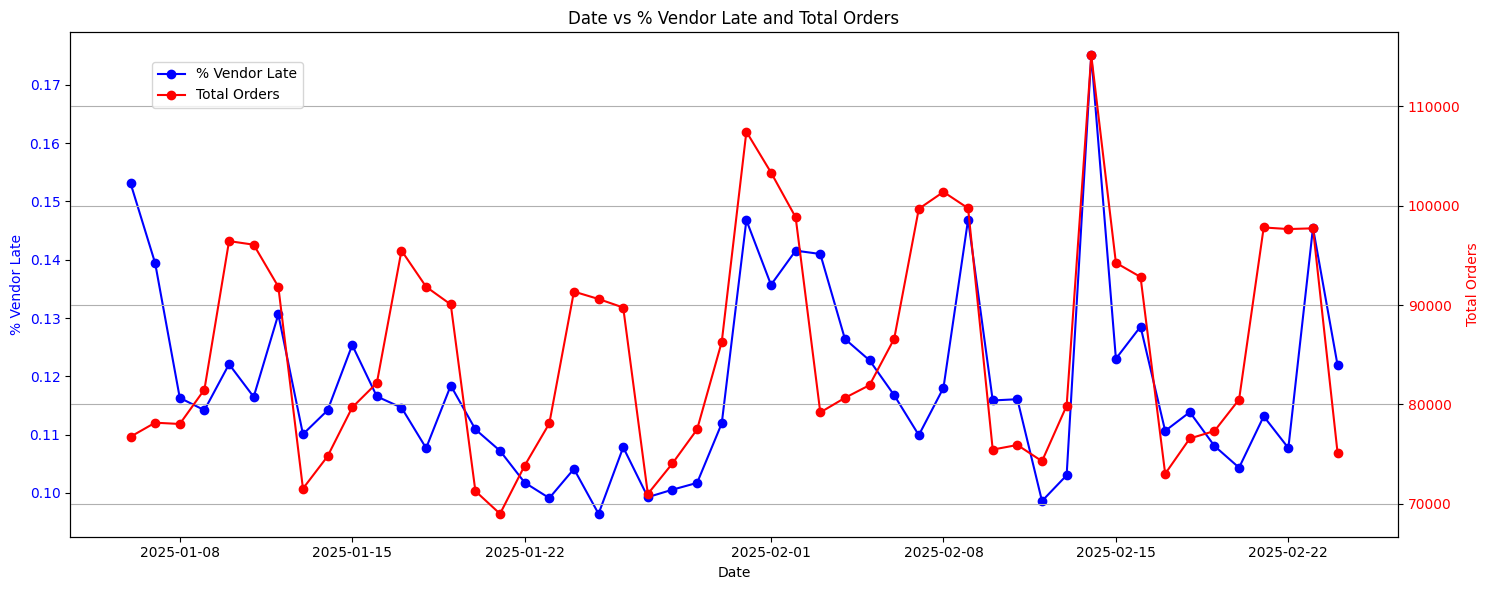

In [10]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(15, 6))

# Graficar % Vendor Late
ax1.plot(prueba['logistic_orders_created_date_local_date'], prueba['%vendor_late'], marker='o', linestyle='-', color='b', label='% Vendor Late')
ax1.set_xlabel('Date')
ax1.set_ylabel('% Vendor Late', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje y para la suma de órdenes
ax2 = ax1.twinx()
ax2.plot(prueba['logistic_orders_created_date_local_date'], prueba['peya_order_id'], marker='o', linestyle='-', color='r', label='Total Orders')
ax2.set_ylabel('Total Orders', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Título y leyenda
plt.title('Date vs % Vendor Late and Total Orders')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [11]:
dfaux=df1[df1["logistic_orders_created_date_local_date"]>="2025-01-06"]
dfgrouped=dfaux.groupby(["logistic_orders_created_date_local_date","logistic_orders_created_date_local_day_of_week"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"]]
prueba=prueba.reset_index()
prueba=prueba[prueba["logistic_orders_created_date_local_day_of_week"]=="Friday"]
prueba


,logistic_orders_created_date_local_date,logistic_orders_created_date_local_day_of_week,peya_order_id,slow_delivery,lcf,%vendor_late,%rider_late,estimated_prep_time,at_vendor_time
4,2025-01-10,Friday,96437,0.148024,0.052138,0.122083,0.060447,15.816688,6.767738
11,2025-01-17,Friday,95485,0.148306,0.049746,0.114632,0.056850,16.064679,6.519009
18,2025-01-24,Friday,91355,0.128313,0.047540,0.104116,0.046000,16.038382,6.462297
25,2025-01-31,Friday,107447,0.188335,0.057005,0.146790,0.073944,16.470683,7.029804
32,2025-02-07,Friday,99691,0.144898,0.048149,0.109912,0.051067,16.244273,6.559151
39,2025-02-14,Friday,115141,0.251744,0.075898,0.175073,0.107304,16.943565,7.494163
46,2025-02-21,Friday,97809,0.151213,0.050241,0.113139,0.054330,16.256847,6.613061


In [165]:
import numpy as np
# Define las condiciones y asigna los valores a la columna 'grupo'
conditions = [
      (df1['logistic_orders_created_date_local_date'] == '2025-02-14') ,
    #(df1['logistic_orders_created_date_local_date']== '2025-01-17	') ,
    (df1['logistic_orders_created_date_local_date']== '2025-02-21	') 
    #(df1['logistic_orders_created_date_local_date'] <= '2024-05-06')
]

values = ['14 feb', 'comparacion']

# Por defecto, si no cumple ninguna de las condiciones anteriores, se asigna 'otras_fechas'
df1['grupo'] = pd.Series(np.select(conditions, values, default='otras_fechas'))

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2075196389.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['grupo'] = pd.Series(np.select(conditions, values, default='otras_fechas'))


In [166]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'created_time',
       'sent_to_vendor', 'rider_picked_up_at_local',
       'dim_partner_partner_name', 'dim_partner_partner_id', 'peya_order_id',
       'order_status', 'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'qty_total_products',
       'confirmed_gmv', 'at_vendor_time_cleaned', 'at_vendor_time',
       'assumed_prep_time', 'promised_delivery_time', 'actual_delivery_time',
       'vendor_late_min', 'rider_late_min', 'hold_back_time_min',
       'estimated_walk_in_min', 'estimated_walk_out_min',
     

In [196]:
dfaux=df1[(df1["grupo"].isin(["14 feb","comparacion"]))]
dfgrouped=dfaux.groupby(["business_type_name","grupo"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"]]
prueba=prueba.reset_index()
prueba_pivot=prueba.pivot(index="business_type_name",columns="grupo",values=["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"])
prueba_pivot.columns = ['_'.join(col) for col in prueba_pivot.columns]
prueba_pivot=prueba_pivot.reset_index()
prueba_pivot


,business_type_name,peya_order_id_14 feb,peya_order_id_comparacion,slow_delivery_14 feb,slow_delivery_comparacion,lcf_14 feb,lcf_comparacion,%vendor_late_14 feb,%vendor_late_comparacion,%rider_late_14 feb,%rider_late_comparacion,estimated_prep_time_14 feb,estimated_prep_time_comparacion,at_vendor_time_14 feb,at_vendor_time_comparacion
0,Courier,220.0,185.0,0.027273,0.037838,0.018182,0.043243,0.092593,0.108696,0.190000,0.188235,3.872727,3.983784,3.197454,3.291576
1,Courier Business,2611.0,2308.0,0.137495,0.103986,0.000000,0.000000,0.124659,0.095626,0.091736,0.074824,13.439590,12.982810,5.626667,5.231100
2,Drinks,4681.0,4361.0,0.039094,0.027058,0.049776,0.045173,0.046729,0.029903,0.126134,0.105542,5.698700,5.731429,2.792432,2.725079
3,Market,11732.0,10119.0,0.093164,0.061271,0.066485,0.058701,0.146166,0.157382,0.094501,0.060591,7.814168,7.717155,6.191170,6.961589
4,Pets,174.0,183.0,0.057471,0.032787,0.034483,0.043716,0.053435,0.026667,0.170886,0.085366,7.423729,7.180328,2.922868,2.505556
5,Pharmacy,537.0,459.0,0.098696,0.065359,0.050279,0.032680,0.072398,0.039702,0.090535,0.062791,10.305556,10.880435,4.617287,5.015284
6,Restaurant,95104.0,80174.0,0.247550,0.171776,0.071206,0.051663,0.165435,0.115938,0.088401,0.057202,18.312409,17.710771,7.694221,6.841931
7,Shop,154.0,33.0,0.090909,0.030303,0.045455,0.030303,0.073529,0.064516,0.068493,0.060606,12.432258,12.484848,4.410215,4.551010
8,no business,30.0,41.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,16.333333,16.073171,0.005556,0.000000


In [200]:
dfaux=df1[(df1["grupo"].isin(["14 feb","comparacion"])) & (df1["business_type_name"].isin(["Restaurant"]))]
dfgrouped=dfaux.groupby(["horario","grupo"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"]]
prueba=prueba.reset_index()
prueba_pivot=prueba.pivot(index="horario",columns="grupo",values=["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"])
prueba_pivot.columns = ['_'.join(col) for col in prueba_pivot.columns]
prueba_pivot=prueba_pivot.reset_index()
prueba_pivot

,horario,peya_order_id_14 feb,peya_order_id_comparacion,slow_delivery_14 feb,slow_delivery_comparacion,lcf_14 feb,lcf_comparacion,%vendor_late_14 feb,%vendor_late_comparacion,%rider_late_14 feb,%rider_late_comparacion,estimated_prep_time_14 feb,estimated_prep_time_comparacion,at_vendor_time_14 feb,at_vendor_time_comparacion
0,0-7,1354.0,1231.0,0.203840,0.192526,0.086411,0.083672,0.145946,0.160204,0.099026,0.097606,17.505140,17.231579,6.529727,6.783129
1,12-14,26084.0,22098.0,0.187203,0.131777,0.059385,0.047606,0.131034,0.098340,0.066732,0.046027,16.698312,16.474659,6.972901,6.662406
2,15-18,23109.0,18593.0,0.183608,0.115635,0.066857,0.048190,0.122726,0.083202,0.072516,0.049023,16.529341,15.510230,6.928977,6.248680
3,19-23,40132.0,35595.0,0.332852,0.230847,0.077868,0.054474,0.214827,0.144819,0.113139,0.066644,20.985280,20.026056,8.577613,7.268769
4,8-11,4425.0,2657.0,0.176949,0.096349,0.098531,0.057207,0.173814,0.095258,0.073832,0.064591,13.137830,12.595793,8.268905,6.785360


In [202]:
dfaux=df1[(df1["grupo"].isin(["14 feb","comparacion"])) & (df1["business_type_name"].isin(["Restaurant"]))]
dfgrouped=dfaux.groupby(["cuisine","grupo"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"]]
prueba=prueba.reset_index()
prueba_pivot=prueba.pivot(index="cuisine",columns="grupo",values=["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"])
prueba_pivot.columns = ['_'.join(col) for col in prueba_pivot.columns]
prueba_pivot=prueba_pivot.reset_index()
prueba_pivot[prueba_pivot["peya_order_id_14 feb"]>=1000]

,cuisine,peya_order_id_14 feb,peya_order_id_comparacion,slow_delivery_14 feb,slow_delivery_comparacion,lcf_14 feb,lcf_comparacion,%vendor_late_14 feb,%vendor_late_comparacion,%rider_late_14 feb,%rider_late_comparacion,estimated_prep_time_14 feb,estimated_prep_time_comparacion,at_vendor_time_14 feb,at_vendor_time_comparacion
0,cafetería,4647.0,2130.0,0.211965,0.075117,0.123090,0.058216,0.217381,0.091884,0.080570,0.052708,14.028774,12.459447,9.112754,6.635364
3,comida casera,1982.0,1717.0,0.154390,0.131043,0.058022,0.044846,0.094602,0.107211,0.066978,0.058859,16.771948,16.789412,5.881280,6.316460
4,comida china,4249.0,3830.0,0.112026,0.111488,0.046835,0.048042,0.072908,0.077257,0.074515,0.071467,13.799953,13.746214,5.555807,5.493876
6,comida mexicana,1156.0,1122.0,0.157439,0.098039,0.073529,0.040998,0.132057,0.090735,0.074402,0.043836,14.974093,15.357970,7.283348,7.071829
7,comida peruana,1149.0,922.0,0.163621,0.133406,0.042646,0.048807,0.102307,0.090253,0.089498,0.062077,18.072111,17.845987,5.852337,5.891904
12,completos,4464.0,3934.0,0.140009,0.109812,0.060036,0.047789,0.122560,0.118069,0.059930,0.050052,15.019674,14.985279,7.061372,7.091403
13,empanadas,1072.0,867.0,0.083955,0.081892,0.038246,0.033449,0.077640,0.093671,0.069364,0.057279,13.620336,13.780854,5.275031,5.540120
15,hamburguesas,18904.0,15518.0,0.235559,0.129591,0.075645,0.055033,0.189117,0.116948,0.079158,0.043944,16.955090,15.928291,8.823509,7.706562
16,helados,1082.0,995.0,0.036969,0.026131,0.042514,0.035176,0.055901,0.047032,0.066667,0.056025,7.674977,7.745236,3.933318,3.916855
23,pizzas,14808.0,12644.0,0.398636,0.254587,0.078336,0.058526,0.245841,0.150961,0.113882,0.062749,23.349505,21.774026,9.190609,7.552983


In [203]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'created_time',
       'sent_to_vendor', 'rider_picked_up_at_local',
       'dim_partner_partner_name', 'dim_partner_partner_id', 'peya_order_id',
       'order_status', 'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'qty_total_products',
       'confirmed_gmv', 'at_vendor_time_cleaned', 'at_vendor_time',
       'assumed_prep_time', 'promised_delivery_time', 'actual_delivery_time',
       'vendor_late_min', 'rider_late_min', 'hold_back_time_min',
       'estimated_walk_in_min', 'estimated_walk_out_min',
     

In [204]:
df1['sent_to_vendor'] = pd.to_datetime(df1['sent_to_vendor'])

# Supongamos que `estimated_prep_time` está en minutos
# Si está en segundos, sólo cambia `pd.to_timedelta(df['estimated_prep_time'], unit='minutes')` por `unit='seconds'`.
df1['cpu'] = df1['sent_to_vendor'] + pd.to_timedelta(df1['estimated_prep_time'], unit='minutes')
df1

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2422081743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sent_to_vendor'] = pd.to_datetime(df1['sent_to_vendor'])
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2422081743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cpu'] = df1['sent_to_vendor'] + pd.to_timedelta(df1['estimated_prep_time'], unit='minutes')


,Unnamed: 0,logistic_orders_country__country_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,created_time,sent_to_vendor,rider_picked_up_at_local,dim_partner_partner_name,dim_partner_partner_id,peya_order_id,...,ept_atvc,horario,dia_semana,grupo,cpu,computed,temporary,fijos,strategy,cambios_14
0,0,Chile,2025-01-13,2025-01-19,2025-01-19 17:33:43.926385+00:00,2025-01-19 14:33:44.290517,2025-01-19 14:39:17.434839,Zambuka Market,169921.0,1424865485,...,5.550000,12-14,FIN_DE_SEMANA,otras_fechas,2025-01-19 14:38:44.290517,0,1,0,temporary,0
1,1,Chile,2025-02-17,2025-02-22,2025-02-23 02:56:05.942973+00:00,2025-02-22 23:56:06.569460,2025-02-23 00:12:50.216192,Zambuka Drinks,66842.0,1462278577,...,11.516667,19-23,FIN_DE_SEMANA,otras_fechas,2025-02-23 00:02:06.569460,0,0,1,fijos,0
2,2,Chile,2025-01-20,2025-01-22,2025-01-22 23:52:09.846050+00:00,2025-01-22 20:52:10.353152,2025-01-22 20:56:07.190749,Zambuka Drinks,66842.0,1428336755,...,6.000000,19-23,DIA_DE_SEMANA,otras_fechas,2025-01-22 20:58:10.353152,0,0,1,fijos,0
3,3,Chile,2025-01-27,2025-02-01,2025-02-02 01:07:39.924876+00:00,2025-02-01 22:07:40.548460,2025-02-01 22:29:43.973651,Zambuka Market,169921.0,1438709167,...,NaN,19-23,FIN_DE_SEMANA,otras_fechas,2025-02-01 22:12:40.548460,0,1,0,temporary,0
4,4,Chile,2025-01-06,2025-01-08,2025-01-09 00:47:08.348878+00:00,2025-01-08 21:47:08.940127,2025-01-08 21:53:43.316968,Zambuka Drinks,66842.0,1413121360,...,6.566667,19-23,DIA_DE_SEMANA,otras_fechas,2025-01-08 21:53:08.940127,0,0,1,fijos,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719618,4719618,Chile,2025-01-06,2025-01-10,2025-01-10 23:19:43.003197+00:00,2025-01-10 20:20:10.853497,2025-01-10 20:32:06.792320,Hell Street Bar,107474.0,1414847596,...,13.000000,19-23,FIN_DE_SEMANA,NaN,2025-01-10 20:33:10.853497,1,0,0,computed,0
4719619,4719619,Chile,2025-02-03,2025-02-04,2025-02-04 16:46:10.973495+00:00,2025-02-04 13:46:59.289472,2025-02-04 14:03:09.737558,Pimpollos La Calera,518471.0,1441373806,...,15.133333,12-14,DIA_DE_SEMANA,NaN,2025-02-04 14:01:59.289472,1,0,0,computed,0
4719620,4719620,Chile,2025-01-20,2025-01-20,2025-01-20 22:12:03.907965+00:00,2025-01-20 19:13:18.392460,2025-01-20 19:50:55.733103,Alaska Sushi Fusion - Teatinos,284242.0,1426283711,...,NaN,19-23,DIA_DE_SEMANA,NaN,2025-01-20 19:40:18.392460,1,0,0,computed,0
4719621,4719621,Chile,2025-01-13,2025-01-15,2025-01-15 23:49:08.582855+00:00,2025-01-15 20:49:09.051499,2025-01-15 20:54:45.222857,Minimarket Melissa,328315.0,1420956941,...,5.600000,19-23,DIA_DE_SEMANA,NaN,2025-01-15 20:54:09.051499,1,0,0,computed,0


In [205]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'created_time',
       'sent_to_vendor', 'rider_picked_up_at_local',
       'dim_partner_partner_name', 'dim_partner_partner_id', 'peya_order_id',
       'order_status', 'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'qty_total_products',
       'confirmed_gmv', 'at_vendor_time_cleaned', 'at_vendor_time',
       'assumed_prep_time', 'promised_delivery_time', 'actual_delivery_time',
       'vendor_late_min', 'rider_late_min', 'hold_back_time_min',
       'estimated_walk_in_min', 'estimated_walk_out_min',
     

In [206]:
if flag ==0:
    
    sql3 = """
    
    with datos1 as (select * from (
    SELECT  
    v2.entity_id
    ,safe_cast(v2.vendor_code as integer) vendor_code
    ,pt.strategy
    ,pt.updated_at
   
   ,row_number() over (partition by v2.vendor_code order by pt.updated_at desc) as rn  --last update
    FROM `fulfillment-dwh-production.curated_data_shared.vendors_time_estimations` as v2 , unnest(prep_time_config) pt
    where v2.entity_id = 'PY_CL'  
    #and vendor_code = "58458"
    and strategy in ("OPS_TEMPORARY","OPS_PERMANENT","COMPUTED")
    and updated_at<="2025-02-15"
    and updated_by not in ("system")
    ) where rn=1
   # and updated_at<="2025-02-03"
    
    )

select * 
from datos1
order by updated_at desc

    """
    data3=client.query(sql3).to_dataframe()
    data3.to_csv("data3.csv")
else:
    
    data3=pd.read_csv("data3.csv")

In [207]:
df3comp=data3[data3["strategy"]=="COMPUTED"]
df3temp=data3[data3["strategy"]=="OPS_TEMPORARY"]
df3fix=data3[data3["strategy"]=="OPS_PERMANENT"]

df1['computed'] = df1['dim_partner_partner_id'].isin(df3comp['vendor_code']).astype(int)
df1['temporary'] = df1['dim_partner_partner_id'].isin(df3temp['vendor_code']).astype(int)
df1['fijos'] = df1['dim_partner_partner_id'].isin(df3fix['vendor_code']).astype(int)

df1['strategy'] = np.select(
    [   df1['computed'] == 1, 
        df1['temporary'] == 1,   # Primera condición: 'no_cambio' es 1
        df1['fijos'] == 1        # Segunda condición: 'fijos' es 1
    ],
    [   'computed',
        'temporary',             # Valor si se cumple la primera condición
        'fijos'                  # Valor si se cumple la segunda condición
    ],
    default='none'               # Valor por defecto si no se cumple ninguna
)


C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\3103950709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['computed'] = df1['dim_partner_partner_id'].isin(df3comp['vendor_code']).astype(int)
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\3103950709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['temporary'] = df1['dim_partner_partner_id'].isin(df3temp['vendor_code']).astype(int)
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\3103950709.py:7: SettingWithCopyWarning: 


In [208]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'created_time',
       'sent_to_vendor', 'rider_picked_up_at_local',
       'dim_partner_partner_name', 'dim_partner_partner_id', 'peya_order_id',
       'order_status', 'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'qty_total_products',
       'confirmed_gmv', 'at_vendor_time_cleaned', 'at_vendor_time',
       'assumed_prep_time', 'promised_delivery_time', 'actual_delivery_time',
       'vendor_late_min', 'rider_late_min', 'hold_back_time_min',
       'estimated_walk_in_min', 'estimated_walk_out_min',
     

In [209]:
df1

,Unnamed: 0,logistic_orders_country__country_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,created_time,sent_to_vendor,rider_picked_up_at_local,dim_partner_partner_name,dim_partner_partner_id,peya_order_id,...,ept_atvc,horario,dia_semana,grupo,cpu,computed,temporary,fijos,strategy,cambios_14
0,0,Chile,2025-01-13,2025-01-19,2025-01-19 17:33:43.926385+00:00,2025-01-19 14:33:44.290517,2025-01-19 14:39:17.434839,Zambuka Market,169921.0,1424865485,...,5.550000,12-14,FIN_DE_SEMANA,otras_fechas,2025-01-19 14:38:44.290517,0,1,0,temporary,0
1,1,Chile,2025-02-17,2025-02-22,2025-02-23 02:56:05.942973+00:00,2025-02-22 23:56:06.569460,2025-02-23 00:12:50.216192,Zambuka Drinks,66842.0,1462278577,...,11.516667,19-23,FIN_DE_SEMANA,otras_fechas,2025-02-23 00:02:06.569460,0,0,1,fijos,0
2,2,Chile,2025-01-20,2025-01-22,2025-01-22 23:52:09.846050+00:00,2025-01-22 20:52:10.353152,2025-01-22 20:56:07.190749,Zambuka Drinks,66842.0,1428336755,...,6.000000,19-23,DIA_DE_SEMANA,otras_fechas,2025-01-22 20:58:10.353152,0,0,1,fijos,0
3,3,Chile,2025-01-27,2025-02-01,2025-02-02 01:07:39.924876+00:00,2025-02-01 22:07:40.548460,2025-02-01 22:29:43.973651,Zambuka Market,169921.0,1438709167,...,NaN,19-23,FIN_DE_SEMANA,otras_fechas,2025-02-01 22:12:40.548460,0,1,0,temporary,0
4,4,Chile,2025-01-06,2025-01-08,2025-01-09 00:47:08.348878+00:00,2025-01-08 21:47:08.940127,2025-01-08 21:53:43.316968,Zambuka Drinks,66842.0,1413121360,...,6.566667,19-23,DIA_DE_SEMANA,otras_fechas,2025-01-08 21:53:08.940127,0,0,1,fijos,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719618,4719618,Chile,2025-01-06,2025-01-10,2025-01-10 23:19:43.003197+00:00,2025-01-10 20:20:10.853497,2025-01-10 20:32:06.792320,Hell Street Bar,107474.0,1414847596,...,13.000000,19-23,FIN_DE_SEMANA,NaN,2025-01-10 20:33:10.853497,1,0,0,computed,0
4719619,4719619,Chile,2025-02-03,2025-02-04,2025-02-04 16:46:10.973495+00:00,2025-02-04 13:46:59.289472,2025-02-04 14:03:09.737558,Pimpollos La Calera,518471.0,1441373806,...,15.133333,12-14,DIA_DE_SEMANA,NaN,2025-02-04 14:01:59.289472,1,0,0,computed,0
4719620,4719620,Chile,2025-01-20,2025-01-20,2025-01-20 22:12:03.907965+00:00,2025-01-20 19:13:18.392460,2025-01-20 19:50:55.733103,Alaska Sushi Fusion - Teatinos,284242.0,1426283711,...,NaN,19-23,DIA_DE_SEMANA,NaN,2025-01-20 19:40:18.392460,1,0,0,computed,0
4719621,4719621,Chile,2025-01-13,2025-01-15,2025-01-15 23:49:08.582855+00:00,2025-01-15 20:49:09.051499,2025-01-15 20:54:45.222857,Minimarket Melissa,328315.0,1420956941,...,5.600000,19-23,DIA_DE_SEMANA,NaN,2025-01-15 20:54:09.051499,1,0,0,computed,0


In [210]:
dfaux=df1[(df1["order_status"]=="completed") & (df1["business_type_name"]=="Restaurant") & (df1["grupo"].isin(["14 feb","comparacion"]))]
dfgrouped=dfaux.groupby(["strategy","grupo"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"]]
prueba=prueba.reset_index()
prueba


,strategy,grupo,peya_order_id,slow_delivery,lcf,%vendor_late,%rider_late,estimated_prep_time,at_vendor_time
0,computed,14 feb,62701,0.228098,0.066044,0.147764,0.083427,17.780922,7.401546
1,computed,comparacion,53120,0.167131,0.050527,0.107259,0.055790,17.597009,6.757167
2,fijos,14 feb,4677,0.355570,0.128501,0.365775,0.133848,15.643771,12.458666
3,fijos,comparacion,4123,0.234295,0.082222,0.268533,0.087147,15.373304,10.060155
4,none,14 feb,455,0.191209,0.101099,0.166667,0.106667,15.239560,6.270296
5,none,comparacion,477,0.150943,0.096436,0.122172,0.059574,15.767296,6.994113
6,temporary,14 feb,24964,0.295225,0.077111,0.174203,0.091994,20.114393,8.061785
7,temporary,comparacion,20769,0.183013,0.050893,0.108590,0.054790,18.484993,6.835934


In [211]:
cambios_especificos=pd.read_csv("CAMBIOS 14 DE FEB - resto de cuisines.csv")
df1["cambios_14"]=df1["dim_partner_partner_id"].isin(cambios_especificos["dim_partner_partner_id"]).astype(int)


C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2643842454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["cambios_14"]=df1["dim_partner_partner_id"].isin(cambios_especificos["dim_partner_partner_id"]).astype(int)


In [212]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'created_time',
       'sent_to_vendor', 'rider_picked_up_at_local',
       'dim_partner_partner_name', 'dim_partner_partner_id', 'peya_order_id',
       'order_status', 'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'qty_total_products',
       'confirmed_gmv', 'at_vendor_time_cleaned', 'at_vendor_time',
       'assumed_prep_time', 'promised_delivery_time', 'actual_delivery_time',
       'vendor_late_min', 'rider_late_min', 'hold_back_time_min',
       'estimated_walk_in_min', 'estimated_walk_out_min',
     

In [213]:
df1["cuisine"].unique()

array(['no-cuisine', 'sushi', 'helados', 'cafetería', 'hamburguesas',
       'sándwiches', 'pollo frito', 'wraps', 'pizzas', 'comida china',
       'pastas', 'comida vegetariana', 'comida vegana', 'comida mexicana',
       'postres y tortas', 'completos', 'panadería', 'comida asiática',
       'comida peruana', 'poke', 'pescados y mariscos', 'carnes',
       'ensaladas', 'comida casera', 'empanadas', 'pollo asado',
       'comida india', 'comida árabe', 'licuados y jugos',
       'comida venezolana', 'picadas', 'comida italiana'], dtype=object)

In [214]:
dfaux=df1[(df1["order_status"]=="completed") & (df1["business_type_name"]=="Restaurant") & (df1["grupo"].isin(["14 feb","comparacion"])) & (df1["logistic_orders_created_at_local_hour_of_day"]>=19) & (df1["cuisine"].isin(["sushi","hamburguesas","pollo frito","pizzas","cafetería"]))]
dfgrouped=dfaux.groupby(["cambios_14","strategy","grupo"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean","dim_partner_partner_id":"nunique"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time","dim_partner_partner_id"]]
prueba=prueba.reset_index()
prueba

,cambios_14,strategy,grupo,peya_order_id,slow_delivery,lcf,%vendor_late,%rider_late,estimated_prep_time,at_vendor_time,dim_partner_partner_id
0,0,computed,14 feb,16155,0.403528,0.079542,0.246555,0.117878,23.143820,9.305962,2259
1,0,computed,comparacion,13990,0.292638,0.055325,0.152807,0.063161,22.750786,7.683351,2163
2,0,fijos,14 feb,1115,0.449327,0.133632,0.400666,0.186089,17.022422,13.079615,113
3,0,fijos,comparacion,1014,0.321499,0.105523,0.332594,0.105159,16.869951,12.160384,108
4,0,none,14 feb,117,0.213675,0.111111,0.224299,0.085470,16.478632,7.536895,49
5,0,none,comparacion,144,0.215278,0.104167,0.156716,0.042857,18.131944,8.277738,45
6,0,temporary,14 feb,3891,0.380879,0.098946,0.231573,0.136340,22.671198,9.066375,501
7,0,temporary,comparacion,3737,0.291143,0.049505,0.128077,0.081314,22.581352,6.902477,496
8,1,computed,14 feb,19,0.684211,0.052632,0.250000,0.157895,33.052632,7.371930,1
9,1,computed,comparacion,21,0.523810,0.047619,0.187500,0.238095,32.571429,10.065873,1


In [215]:
dfaux=df1[(df1["order_status"]=="completed") & (df1["business_type_name"]=="Restaurant") & (df1["grupo"].isin(["14 feb","comparacion"])) & (df1["logistic_orders_created_at_local_hour_of_day"]>=19) & (df1["cuisine"].isin(["sushi","hamburguesas","pollo frito","pizzas","cafetería"]))]
dfgrouped=dfaux.groupby(["cambios_14","strategy","dim_partner_partner_id"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time"]]
prueba=prueba.reset_index()
prueba=prueba[prueba["peya_order_id"]>=30]
ids=prueba["dim_partner_partner_id"].unique()

In [216]:
dfaux=df1[(df1["order_status"]=="completed") & (df1["business_type_name"]=="Restaurant") & (df1["grupo"].isin(["14 feb","comparacion"])) & (df1["logistic_orders_created_at_local_hour_of_day"]>=19) & (df1["cuisine"].isin(["sushi","hamburguesas","pollo frito","pizzas","cafetería"])) & (df1["dim_partner_partner_id"].isin(ids))]
dfgrouped=dfaux.groupby(["cambios_14","strategy","grupo"]).agg({"peya_order_id":"nunique","slow_delivery":"sum","lcf":"sum","is_vendor_late_10":"sum","is_vendor_late_nn":"sum","is_rider_late_10":"sum","is_rider_late_nn":"sum","estimated_prep_time":"mean","at_vendor_time":"mean","dim_partner_partner_id":"nunique"})
dfgrouped["slow_delivery"]=dfgrouped["slow_delivery"]/dfgrouped["peya_order_id"]
dfgrouped["lcf"]=dfgrouped["lcf"]/dfgrouped["peya_order_id"]
dfgrouped["%vendor_late"]=dfgrouped["is_vendor_late_10"]/dfgrouped["is_vendor_late_nn"]
dfgrouped["%rider_late"]=dfgrouped["is_rider_late_10"]/dfgrouped["is_rider_late_nn"]
prueba=dfgrouped[["peya_order_id","slow_delivery","lcf","%vendor_late","%rider_late","estimated_prep_time","at_vendor_time","dim_partner_partner_id"]]
prueba=prueba.reset_index()
prueba

,cambios_14,strategy,grupo,peya_order_id,slow_delivery,lcf,%vendor_late,%rider_late,estimated_prep_time,at_vendor_time,dim_partner_partner_id
0,0,computed,14 feb,7601,0.514274,0.080516,0.304525,0.121389,25.598764,10.589116,259
1,0,computed,comparacion,6794,0.356491,0.049308,0.163050,0.047675,24.819144,8.318472,260
2,0,fijos,14 feb,578,0.486159,0.115917,0.415094,0.167539,17.588235,13.875044,22
3,0,fijos,comparacion,526,0.342205,0.119772,0.338298,0.103053,17.091255,12.928372,22
4,0,none,14 feb,25,0.160000,0.040000,0.083333,0.040000,16.120000,7.252000,1
5,0,none,comparacion,68,0.191176,0.088235,0.136364,0.014925,18.808824,8.367662,2
6,0,temporary,14 feb,1886,0.445917,0.106575,0.288413,0.156665,23.837123,9.671641,77
7,0,temporary,comparacion,1736,0.310484,0.042051,0.126177,0.077057,23.201034,6.613403,77
8,1,computed,14 feb,19,0.684211,0.052632,0.250000,0.157895,33.052632,7.371930,1
9,1,computed,comparacion,21,0.523810,0.047619,0.187500,0.238095,32.571429,10.065873,1


In [217]:
dfaux=df1[(df1["order_status"]=="completed") & (df1["business_type_name"]=="Restaurant") & (df1["grupo"].isin(["14 feb","comparacion"])) &  (df1['strategy']=="computed")]
dfaux=dfaux[['logistic_orders_country__country_name','dim_partner_partner_id','dim_partner_partner_name','cuisine','franchise_name', 'strategy','logistic_orders_created_date_local_week','logistic_orders_created_date_local_date','logistic_orders_created_at_local_hour_of_day','logistic_orders_created_date_local_day_of_week','dia_semana','horario','peya_order_id','qty_total_products',
       'confirmed_gmv','estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned',"sent_to_vendor","cpu","rider_picked_up_at_local","grupo"]]

dfaux

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,peya_order_id,qty_total_products,confirmed_gmv,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,grupo
1667,Chile,101316.0,Yutakana Sushi - Libertad,sushi,yutakana,computed,2025-02-10,2025-02-14,18,Friday,...,1452534281,3.0,8030.0,36.0,NaN,0.000000,2025-02-14 18:55:14.748962,2025-02-14 19:31:14.748962,2025-02-14 19:28:44.631585,14 feb
1675,Chile,101316.0,Yutakana Sushi - Libertad,sushi,yutakana,computed,2025-02-10,2025-02-14,21,Friday,...,1452790741,1.0,24770.0,41.0,41.000000,1.250000,2025-02-14 21:23:49.015396,2025-02-14 22:04:49.015396,2025-02-14 22:16:04.086404,14 feb
1695,Chile,101316.0,Yutakana Sushi - Libertad,sushi,yutakana,computed,2025-02-17,2025-02-21,20,Friday,...,1460599267,1.0,14330.0,39.0,39.000000,0.000000,2025-02-21 20:31:06.923867,2025-02-21 21:10:06.923867,2025-02-21 21:14:37.504329,comparacion
1703,Chile,101316.0,Yutakana Sushi - Libertad,sushi,yutakana,computed,2025-02-17,2025-02-21,23,Friday,...,1460994687,1.0,14330.0,37.0,NaN,1.533333,2025-02-21 23:22:57.916736,2025-02-21 23:59:57.916736,2025-02-22 00:12:36.605385,comparacion
1719,Chile,101316.0,Yutakana Sushi - Libertad,sushi,yutakana,computed,2025-02-10,2025-02-14,22,Friday,...,1452866217,1.0,4400.0,41.0,NaN,53.766667,2025-02-14 22:08:54.027461,2025-02-14 22:49:54.027461,2025-02-14 23:53:39.978323,14 feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4718074,Chile,65584.0,Living Sushi,sushi,no franchise,computed,2025-01-20,2025-01-22,21,Wednesday,...,1428421618,2.0,19770.0,11.0,10.766667,0.000000,2025-01-22 21:37:40.644290,2025-01-22 21:48:40.644290,2025-01-22 21:48:27.045344,comparacion
4718078,Chile,199965.0,Rincón De Los Ríos.,pescados y mariscos,no franchise,computed,2024-12-30,2025-01-05,14,Sunday,...,1410258166,1.0,14450.0,18.0,11.283333,0.000000,2025-01-05 14:55:03.801827,2025-01-05 15:13:03.801827,2025-01-05 15:06:21.467719,14 feb
4718125,Chile,276759.0,Oriental City - Comida China,comida china,no franchise,computed,2025-02-03,2025-02-07,13,Friday,...,1444514388,1.0,8790.0,13.0,13.000000,NaN,2025-02-07 13:49:48.083471,2025-02-07 14:02:48.083471,2025-02-07 14:17:22.156364,14 feb
4718180,Chile,119386.0,Panda Sushi Merced,sushi,no franchise,computed,2025-02-03,2025-02-07,13,Friday,...,1444436201,2.0,31560.0,20.0,20.000000,0.916667,2025-02-07 13:09:07.578142,2025-02-07 13:29:07.578142,2025-02-07 13:36:47.763810,14 feb


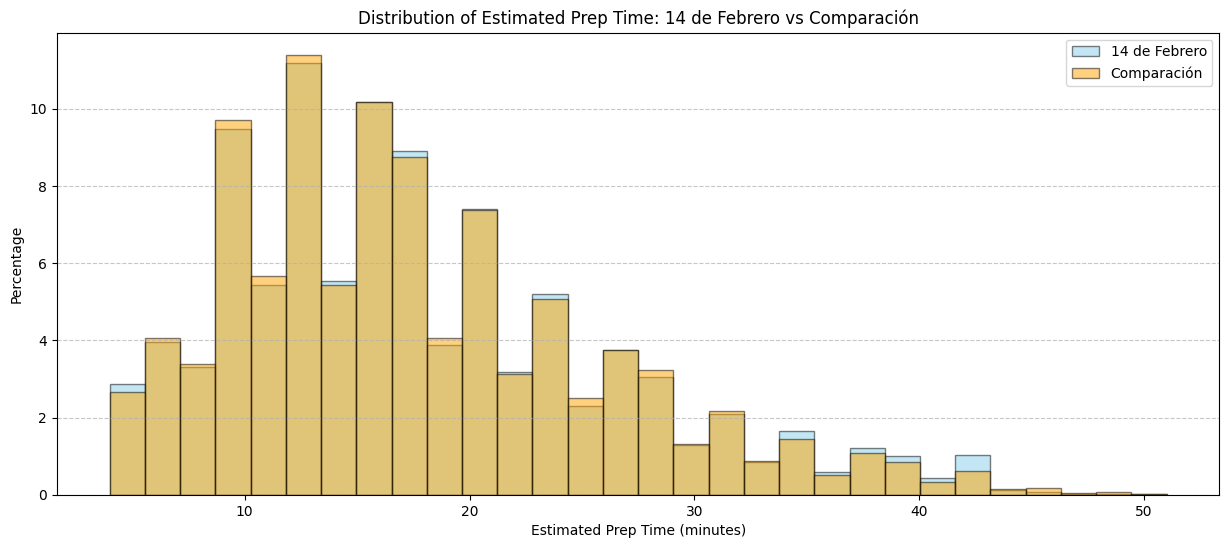

In [218]:
import matplotlib.pyplot as plt

# Filtrar los datos
dfchart_14feb = dfaux[dfaux["grupo"] == "14 feb"]
dfchart_comparacion = dfaux[dfaux["grupo"] == "comparacion"]

# Crear el histograma
plt.figure(figsize=(15, 6))

# Verificar si hay datos antes de crear los histogramas
if len(dfchart_14feb) > 0:
	# Histograma para 14 de febrero
	plt.hist(dfchart_14feb['estimated_prep_time'], bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='14 de Febrero', weights=(100 / len(dfchart_14feb)) * np.ones_like(dfchart_14feb['estimated_prep_time']))

if len(dfchart_comparacion) > 0:
	# Histograma para comparación
	plt.hist(dfchart_comparacion['estimated_prep_time'], bins=30, color='orange', edgecolor='black', alpha=0.5, label='Comparación', weights=(100 / len(dfchart_comparacion)) * np.ones_like(dfchart_comparacion['estimated_prep_time']))

plt.xlabel('Estimated Prep Time (minutes)')
plt.ylabel('Percentage')
plt.title('Distribution of Estimated Prep Time: 14 de Febrero vs Comparación')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Mostrar el histograma
plt.show()

In [219]:
# Crear categorías de 'estimated_prep_time' de 5 en 5
bins = range(0, int(dfaux['estimated_prep_time'].max()) + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]
dfaux['estimated_prep_time_category'] = pd.cut(dfaux['estimated_prep_time'], bins=bins, labels=labels, right=False)

conteo_ordenes_agrupadas = dfaux.groupby(['grupo','estimated_prep_time_category']).agg(
    count=('estimated_prep_time_category', 'size'),

).reset_index()

conteo_ordenes_agrupadas_pivot=conteo_ordenes_agrupadas.pivot(index="estimated_prep_time_category",columns="grupo",values="count").reset_index()
# Calculamos el porcentaje para cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas_pivot["%_14feb"] = (conteo_ordenes_agrupadas_pivot["14 feb"] / conteo_ordenes_agrupadas_pivot["14 feb"].sum())
conteo_ordenes_agrupadas_pivot["%_comparacion"] = (conteo_ordenes_agrupadas_pivot["comparacion"] / conteo_ordenes_agrupadas_pivot["comparacion"].sum())
conteo_ordenes_agrupadas_pivot

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\500917245.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_ordenes_agrupadas = dfaux.groupby(['grupo','estimated_prep_time_category']).agg(


grupo,estimated_prep_time_category,14 feb,comparacion,%_14feb,%_comparacion
0,0-4,52,36,0.000829,0.000677
1,5-9,9121,7803,0.145399,0.146797
2,10-14,17005,14653,0.271078,0.275666
3,15-19,14392,12208,0.229424,0.229668
4,20-24,9903,8283,0.157865,0.155827
5,25-29,5696,5040,0.090800,0.094817
6,30-34,3199,2731,0.050996,0.051378
7,35-39,1951,1444,0.031101,0.027166
8,40-44,1314,801,0.020947,0.015069
9,45-49,87,150,0.001387,0.002822


In [187]:
import pandas as pd

# Aseguramos que las columnas de fechas están en formato datetime
dfaux['sent_to_vendor'] = pd.to_datetime(dfaux['sent_to_vendor'])
dfaux['rider_picked_up_at_local'] = pd.to_datetime(dfaux['rider_picked_up_at_local'])

# Ordenamos el DataFrame por partner y por tiempo de envío
dfaux = dfaux.sort_values(by=['dim_partner_partner_id', 'sent_to_vendor'])

# Función para contar órdenes en cola dentro de un grupo
def contar_ordenes_en_cola(grupo):
    # Inicializamos un contador de órdenes en cola
    ordenes_en_cola = []
    
    for i in range(len(grupo)):
        sent_time = grupo['sent_to_vendor'].iloc[i]
        
        # Contamos cuántas órdenes anteriores aún están en cola
        en_cola = ((grupo['sent_to_vendor'] < sent_time) & 
                   (grupo['rider_picked_up_at_local'] > sent_time)).sum()
        
        ordenes_en_cola.append(en_cola)
    
    return pd.Series(ordenes_en_cola, index=grupo.index)

# Aplicamos la función a cada grupo de `dim_partner_partner_id`
dfaux['orden_en_cola'] = dfaux.groupby('dim_partner_partner_id', group_keys=False).apply(contar_ordenes_en_cola)

dfaux



C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2503564238.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfaux['orden_en_cola'] = dfaux.groupby('dim_partner_partner_id', group_keys=False).apply(contar_ordenes_en_cola)


,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,confirmed_gmv,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,grupo,estimated_prep_time_category,orden_en_cola
388123,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-10,2025-02-14,17,Friday,...,21330.0,13.0,NaN,0.000000,2025-02-14 17:23:42.595180,2025-02-14 17:36:42.595180,2025-02-14 17:32:23.059036,14 feb,10-14,0
393369,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-17,2025-02-21,13,Friday,...,10310.0,10.0,11.300000,1.300000,2025-02-21 13:00:28.867240,2025-02-21 13:10:28.867240,2025-02-21 13:11:47.058794,comparacion,10-14,0
411392,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-17,2025-02-21,14,Friday,...,11090.0,11.0,10.550000,0.000000,2025-02-21 14:17:36.350933,2025-02-21 14:28:36.350933,2025-02-21 14:28:09.427768,comparacion,10-14,0
4192716,Chile,1112.0,Los Maestros,pizzas,no franchise,computed,2025-01-13,2025-01-14,20,Tuesday,...,18039.0,15.0,NaN,15.616667,2025-01-14 20:13:18.639112,2025-01-14 20:28:18.639112,2025-01-14 20:43:55.707342,14 feb,15-19,0
300631,Chile,1869.0,Tarragona Independencia Rancagua,sándwiches,tarragona,computed,2025-02-10,2025-02-14,11,Friday,...,19190.0,12.0,NaN,6.666667,2025-02-14 11:59:36.431360,2025-02-14 12:11:36.431360,2025-02-14 12:18:15.911948,14 feb,10-14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505378,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-10,2025-02-13,21,Thursday,...,20110.0,20.0,15.683333,0.000000,2025-02-13 21:16:42.798690,2025-02-13 21:36:42.798690,2025-02-13 21:32:24.684307,14 feb,20-24,0
3957021,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-17,13,Monday,...,33080.0,19.0,17.516667,0.000000,2025-02-17 13:37:13.086607,2025-02-17 13:56:13.086607,2025-02-17 13:54:44.262404,comparacion,15-19,0
4404343,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-20,12,Thursday,...,9830.0,12.0,12.000000,0.583333,2025-02-20 12:57:24.782384,2025-02-20 13:09:24.782384,2025-02-20 13:14:27.864076,14 feb,10-14,0
3119143,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-21,22,Friday,...,49340.0,27.0,NaN,0.000000,2025-02-21 22:03:37.444900,2025-02-21 22:30:37.444900,2025-02-21 22:26:51.320973,comparacion,25-29,0


In [188]:
dfaux['sent_to_vendor'] = pd.to_datetime(dfaux['sent_to_vendor'])
dfaux['rider_picked_up_at_local'] = pd.to_datetime(dfaux['rider_picked_up_at_local'])

# Ordenamos el DataFrame por partner y por tiempo de envío
dfaux = dfaux.sort_values(by=['dim_partner_partner_id', 'sent_to_vendor'])

# Asumimos que ya hemos calculado 'orden_en_cola'
# Calculamos las órdenes con cola 0
cola_cero = dfaux[dfaux['orden_en_cola'] == 0]

# Creamos una columna para los minutos de prep time adicionales
dfaux['minutos_adicionales_prep_time'] = None

# Iteramos por cada grupo de partners
for partner_id, group in dfaux.groupby('dim_partner_partner_id'):
    # Obtenemos las órdenes con cola 0 para este partner
    ordenes_cola_cero = cola_cero[cola_cero['dim_partner_partner_id'] == partner_id]
    
    # Iteramos sobre cada orden en el grupo actual
    for idx, row in group.iterrows():
        if row['orden_en_cola'] > 0:
            # Encuentra la orden con cola 0 más cercana en el tiempo
            closest_order = ordenes_cola_cero.iloc[(ordenes_cola_cero['sent_to_vendor'] - row['sent_to_vendor']).abs().argsort()[:1]]
            
            # Calcula la diferencia de tiempo de preparación
            if not closest_order.empty:
                prep_time_difference = row['estimated_prep_time'] - closest_order['estimated_prep_time'].values[0]
                dfaux.at[idx, 'minutos_adicionales_prep_time'] = prep_time_difference

dfaux

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2177293057.py:23: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  closest_order = ordenes_cola_cero.iloc[(ordenes_cola_cero['sent_to_vendor'] - row['sent_to_vendor']).abs().argsort()[:1]]
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2177293057.py:23: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  closest_order = ordenes_cola_cero.iloc[(ordenes_cola_cero['sent_to_vendor'] - row['sent_to_vendor']).abs().argsort()[:1]]
C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_6292\2177293057.py:23: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  closest_order = ordenes_cola_cero.iloc[

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,grupo,estimated_prep_time_category,orden_en_cola,minutos_adicionales_prep_time
388123,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-10,2025-02-14,17,Friday,...,13.0,NaN,0.000000,2025-02-14 17:23:42.595180,2025-02-14 17:36:42.595180,2025-02-14 17:32:23.059036,14 feb,10-14,0,None
393369,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-17,2025-02-21,13,Friday,...,10.0,11.300000,1.300000,2025-02-21 13:00:28.867240,2025-02-21 13:10:28.867240,2025-02-21 13:11:47.058794,comparacion,10-14,0,None
411392,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-17,2025-02-21,14,Friday,...,11.0,10.550000,0.000000,2025-02-21 14:17:36.350933,2025-02-21 14:28:36.350933,2025-02-21 14:28:09.427768,comparacion,10-14,0,None
4192716,Chile,1112.0,Los Maestros,pizzas,no franchise,computed,2025-01-13,2025-01-14,20,Tuesday,...,15.0,NaN,15.616667,2025-01-14 20:13:18.639112,2025-01-14 20:28:18.639112,2025-01-14 20:43:55.707342,14 feb,15-19,0,None
300631,Chile,1869.0,Tarragona Independencia Rancagua,sándwiches,tarragona,computed,2025-02-10,2025-02-14,11,Friday,...,12.0,NaN,6.666667,2025-02-14 11:59:36.431360,2025-02-14 12:11:36.431360,2025-02-14 12:18:15.911948,14 feb,10-14,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505378,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-10,2025-02-13,21,Thursday,...,20.0,15.683333,0.000000,2025-02-13 21:16:42.798690,2025-02-13 21:36:42.798690,2025-02-13 21:32:24.684307,14 feb,20-24,0,None
3957021,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-17,13,Monday,...,19.0,17.516667,0.000000,2025-02-17 13:37:13.086607,2025-02-17 13:56:13.086607,2025-02-17 13:54:44.262404,comparacion,15-19,0,None
4404343,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-20,12,Thursday,...,12.0,12.000000,0.583333,2025-02-20 12:57:24.782384,2025-02-20 13:09:24.782384,2025-02-20 13:14:27.864076,14 feb,10-14,0,None
3119143,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-21,22,Friday,...,27.0,NaN,0.000000,2025-02-21 22:03:37.444900,2025-02-21 22:30:37.444900,2025-02-21 22:26:51.320973,comparacion,25-29,0,None


In [189]:
dfaux['orden_en_cola_agrupada'] = dfaux['orden_en_cola'].apply(lambda x: x if x <= 14 else '15+')
dfaux

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,grupo,estimated_prep_time_category,orden_en_cola,minutos_adicionales_prep_time,orden_en_cola_agrupada
388123,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-10,2025-02-14,17,Friday,...,NaN,0.000000,2025-02-14 17:23:42.595180,2025-02-14 17:36:42.595180,2025-02-14 17:32:23.059036,14 feb,10-14,0,None,0
393369,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-17,2025-02-21,13,Friday,...,11.300000,1.300000,2025-02-21 13:00:28.867240,2025-02-21 13:10:28.867240,2025-02-21 13:11:47.058794,comparacion,10-14,0,None,0
411392,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,computed,2025-02-17,2025-02-21,14,Friday,...,10.550000,0.000000,2025-02-21 14:17:36.350933,2025-02-21 14:28:36.350933,2025-02-21 14:28:09.427768,comparacion,10-14,0,None,0
4192716,Chile,1112.0,Los Maestros,pizzas,no franchise,computed,2025-01-13,2025-01-14,20,Tuesday,...,NaN,15.616667,2025-01-14 20:13:18.639112,2025-01-14 20:28:18.639112,2025-01-14 20:43:55.707342,14 feb,15-19,0,None,0
300631,Chile,1869.0,Tarragona Independencia Rancagua,sándwiches,tarragona,computed,2025-02-10,2025-02-14,11,Friday,...,NaN,6.666667,2025-02-14 11:59:36.431360,2025-02-14 12:11:36.431360,2025-02-14 12:18:15.911948,14 feb,10-14,0,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4505378,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-10,2025-02-13,21,Thursday,...,15.683333,0.000000,2025-02-13 21:16:42.798690,2025-02-13 21:36:42.798690,2025-02-13 21:32:24.684307,14 feb,20-24,0,None,0
3957021,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-17,13,Monday,...,17.516667,0.000000,2025-02-17 13:37:13.086607,2025-02-17 13:56:13.086607,2025-02-17 13:54:44.262404,comparacion,15-19,0,None,0
4404343,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-20,12,Thursday,...,12.000000,0.583333,2025-02-20 12:57:24.782384,2025-02-20 13:09:24.782384,2025-02-20 13:14:27.864076,14 feb,10-14,0,None,0
3119143,Chile,537639.0,Chucao Burger Sandwich,hamburguesas,no franchise,computed,2025-02-17,2025-02-21,22,Friday,...,NaN,0.000000,2025-02-21 22:03:37.444900,2025-02-21 22:30:37.444900,2025-02-21 22:26:51.320973,comparacion,25-29,0,None,0


In [190]:
dfaux.columns

Index(['logistic_orders_country__country_name', 'dim_partner_partner_id',
       'dim_partner_partner_name', 'cuisine', 'franchise_name', 'strategy',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_date_local_day_of_week', 'dia_semana',
       'horario', 'peya_order_id', 'qty_total_products', 'confirmed_gmv',
       'estimated_prep_time', 'assumed_prep_time', 'at_vendor_time_cleaned',
       'sent_to_vendor', 'cpu', 'rider_picked_up_at_local', 'grupo',
       'estimated_prep_time_category', 'orden_en_cola',
       'minutos_adicionales_prep_time', 'orden_en_cola_agrupada'],
      dtype='object')

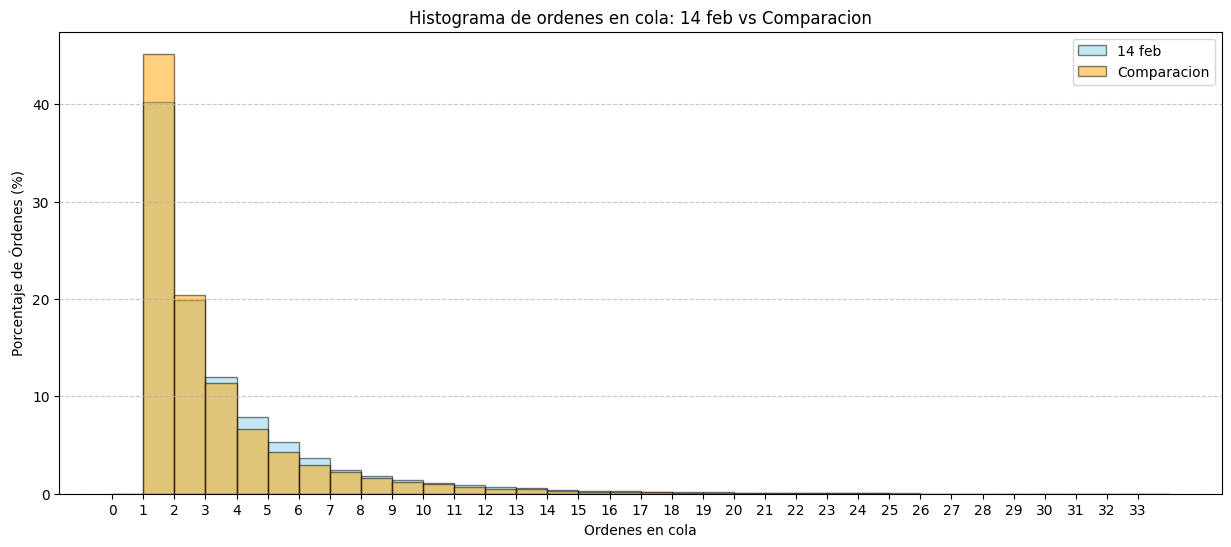

In [191]:
# Filtrar los datos para los grupos "14 feb" y "comparacion"
dfaux_con_ordenes_en_cola = dfaux[(dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['orden_en_cola'] >= 0)]
df_14feb = dfaux_con_ordenes_en_cola[dfaux_con_ordenes_en_cola['grupo'] == '14 feb']
df_comparacion = dfaux_con_ordenes_en_cola[dfaux_con_ordenes_en_cola['grupo'] == 'comparacion']

# Crear el histograma
plt.figure(figsize=(15, 6))

# Histograma para "14 feb"
plt.hist(df_14feb['orden_en_cola'], bins=range(0, int(dfaux['orden_en_cola'].max()) + 2), color='skyblue', edgecolor='black', alpha=0.5, label='14 feb', weights=(100 / len(df_14feb)) * np.ones_like(df_14feb['orden_en_cola']))

# Histograma para "comparacion"
plt.hist(df_comparacion['orden_en_cola'], bins=range(0, int(dfaux['orden_en_cola'].max()) + 2), color='orange', edgecolor='black', alpha=0.5, label='Comparacion', weights=(100 / len(df_comparacion)) * np.ones_like(df_comparacion['orden_en_cola']))

plt.xlabel('Ordenes en cola')
plt.ylabel('Porcentaje de Órdenes (%)')
plt.title('Histograma de ordenes en cola: 14 feb vs Comparacion')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Mostrar todos los valores del eje x
plt.xticks(range(0, int(dfaux['orden_en_cola'].max()) + 1))

# Mostrar el histograma
plt.show()


In [192]:
dfaux.columns

Index(['logistic_orders_country__country_name', 'dim_partner_partner_id',
       'dim_partner_partner_name', 'cuisine', 'franchise_name', 'strategy',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_date_local_day_of_week', 'dia_semana',
       'horario', 'peya_order_id', 'qty_total_products', 'confirmed_gmv',
       'estimated_prep_time', 'assumed_prep_time', 'at_vendor_time_cleaned',
       'sent_to_vendor', 'cpu', 'rider_picked_up_at_local', 'grupo',
       'estimated_prep_time_category', 'orden_en_cola',
       'minutos_adicionales_prep_time', 'orden_en_cola_agrupada'],
      dtype='object')

In [195]:


conteo_ordenes_agrupadas = dfaux.groupby(['grupo','orden_en_cola_agrupada']).agg(
    count=('orden_en_cola_agrupada', 'size'),
    avg_estimated_prep_time=('estimated_prep_time', 'mean'),
    avg_at_vendor_time_cleaned=('at_vendor_time_cleaned', 'mean')
).reset_index()

conteo_ordenes_agrupadas_pivot=conteo_ordenes_agrupadas.pivot(index="orden_en_cola_agrupada", columns="grupo", values=["count", "avg_estimated_prep_time", "avg_at_vendor_time_cleaned"]).reset_index()
conteo_ordenes_agrupadas_pivot.columns = ['_'.join(col) for col in conteo_ordenes_agrupadas_pivot.columns]
conteo_ordenes_agrupadas_pivot=conteo_ordenes_agrupadas_pivot.reset_index()
# Calculamos el porcentaje para cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas_pivot



,index,orden_en_cola_agrupada_,count_14 feb,count_comparacion,avg_estimated_prep_time_14 feb,avg_estimated_prep_time_comparacion,avg_at_vendor_time_cleaned_14 feb,avg_at_vendor_time_cleaned_comparacion
0,0,0,41754.0,37620.0,16.125713,16.094391,3.289093,3.024498
1,1,1,8443.0,7021.0,17.057681,17.566728,4.309482,3.360902
2,2,2,4184.0,3178.0,18.770315,19.408433,5.221072,3.542867
3,3,3,2516.0,1770.0,21.099364,21.973446,6.051876,3.851462
4,4,4,1658.0,1028.0,22.902292,24.365759,6.404597,4.118061
5,5,5,1121.0,659.0,25.331847,26.828528,6.815147,4.554347
6,6,6,775.0,466.0,26.987097,29.152361,7.797539,4.208716
7,7,7,521.0,352.0,30.403071,32.011364,9.225575,4.537847
8,8,8,390.0,249.0,32.097436,33.313253,9.637860,5.150446
9,9,9,296.0,188.0,33.966216,34.228723,9.651267,5.120762


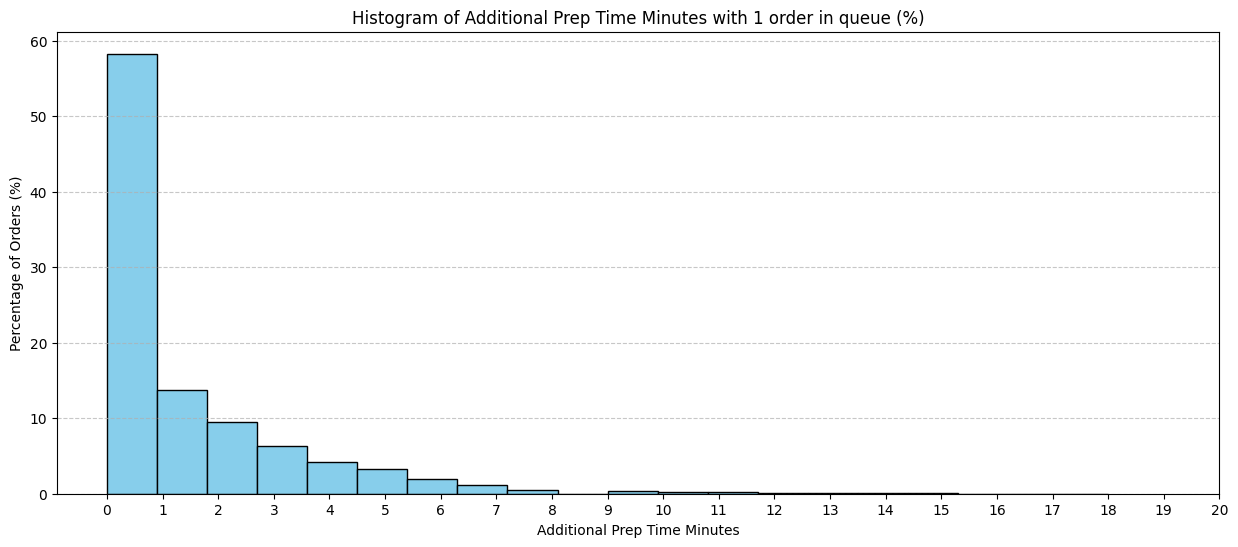

In [58]:
import matplotlib.pyplot as plt

# Filtramos las órdenes con al menos una orden en cola y que tienen calculado los minutos adicionales
dfaux_con_ordenes_en_cola = dfaux[(dfaux['orden_en_cola'] == 1) & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['minutos_adicionales_prep_time']>=0) & (dfaux['minutos_adicionales_prep_time']<=20) & (dfaux['strategy']=="no_cambio")  ]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time'], bins=20, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.xticks(np.arange(0, 21, 1))  # Mostrar de 0 a 20 con un intervalo de 1
plt.xlabel('Additional Prep Time Minutes')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Additional Prep Time Minutes with 1 order in queue (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

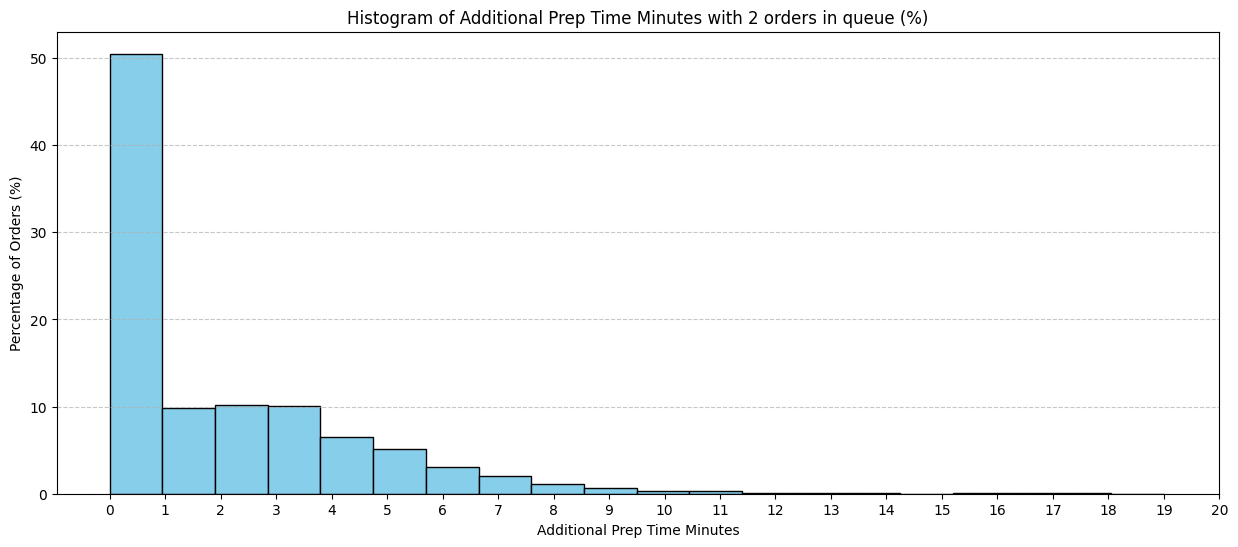

In [59]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['orden_en_cola'] == 2) & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['minutos_adicionales_prep_time']>=0) & (dfaux['minutos_adicionales_prep_time']<=20)  & (dfaux['strategy']=="no_cambio")]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time'], bins=20, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Additional Prep Time Minutes')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Additional Prep Time Minutes with 2 orders in queue (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

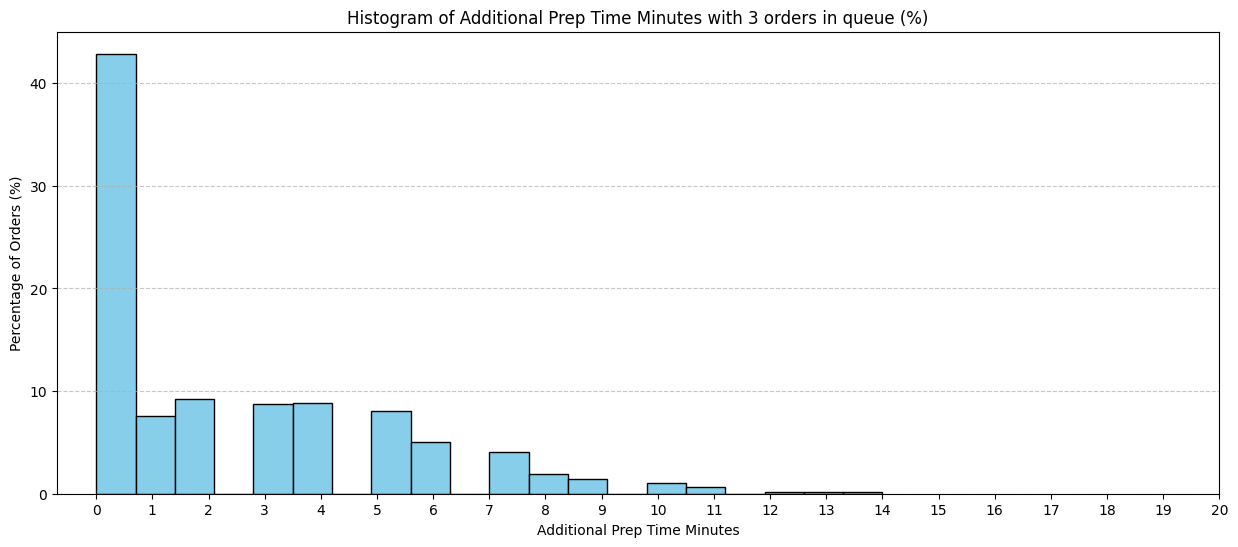

In [60]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['orden_en_cola'] == 3) & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['minutos_adicionales_prep_time']>=0) & (dfaux['minutos_adicionales_prep_time']<=20) & (dfaux['strategy']=="no_cambio")  ]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time'], bins=20, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Additional Prep Time Minutes')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Additional Prep Time Minutes with 3 orders in queue (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

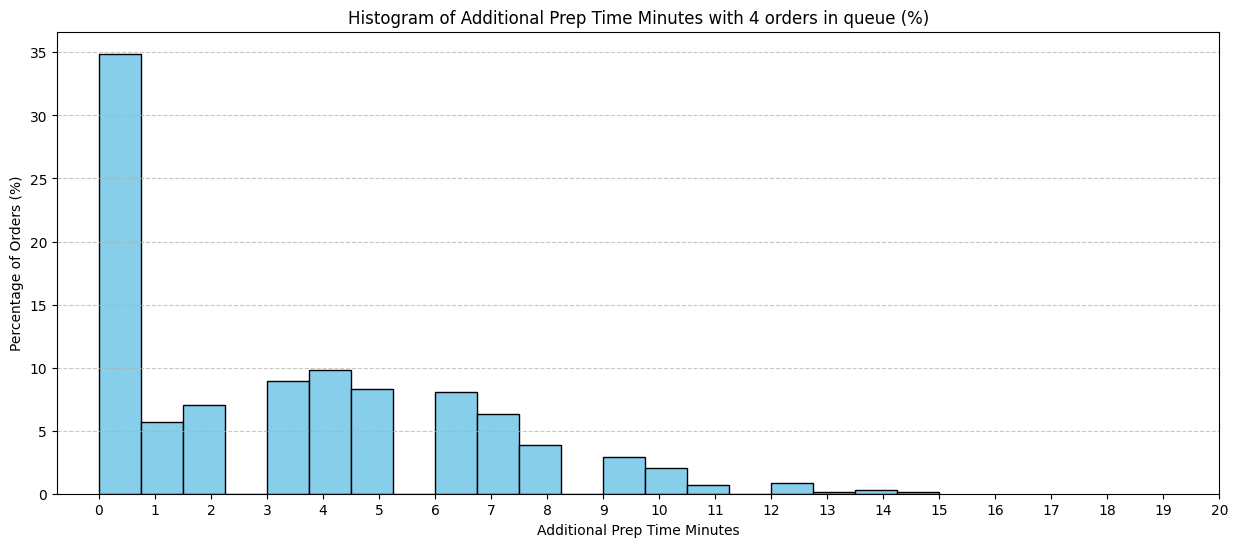

In [61]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['orden_en_cola'] == 4) & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['minutos_adicionales_prep_time']>=0) & (dfaux['minutos_adicionales_prep_time']<=20)  & (dfaux['strategy']=="no_cambio")]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time'], bins=20, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Additional Prep Time Minutes')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Additional Prep Time Minutes with 4 orders in queue (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

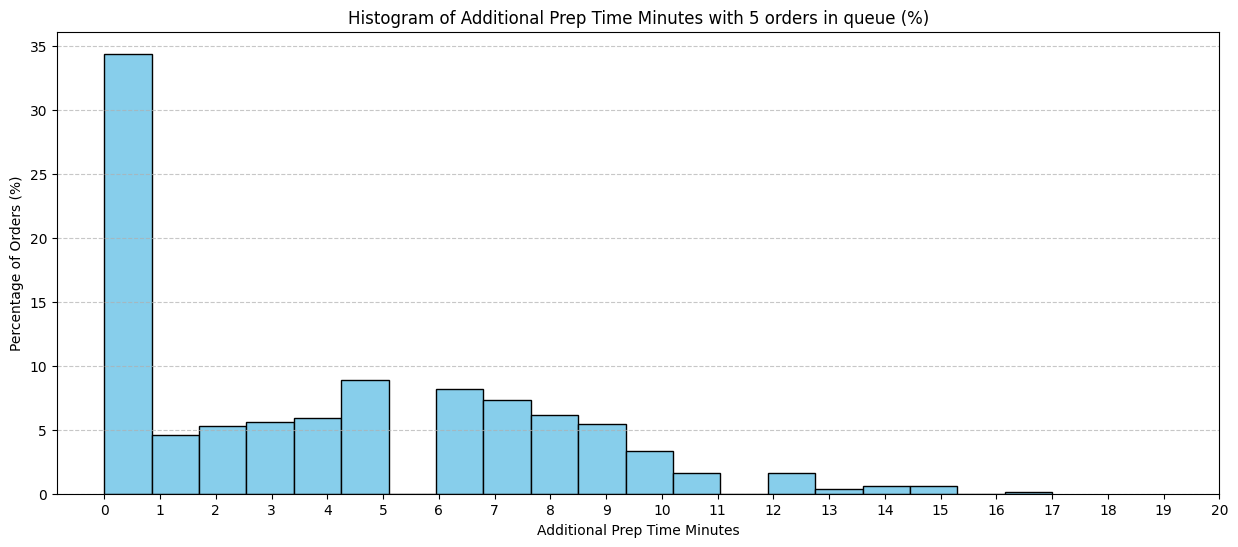

In [62]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['orden_en_cola'] == 5) & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['minutos_adicionales_prep_time']>=0) & (dfaux['minutos_adicionales_prep_time']<=20) & (dfaux['strategy']=="no_cambio")  ]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time'], bins=20, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Additional Prep Time Minutes')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Additional Prep Time Minutes with 5 orders in queue (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

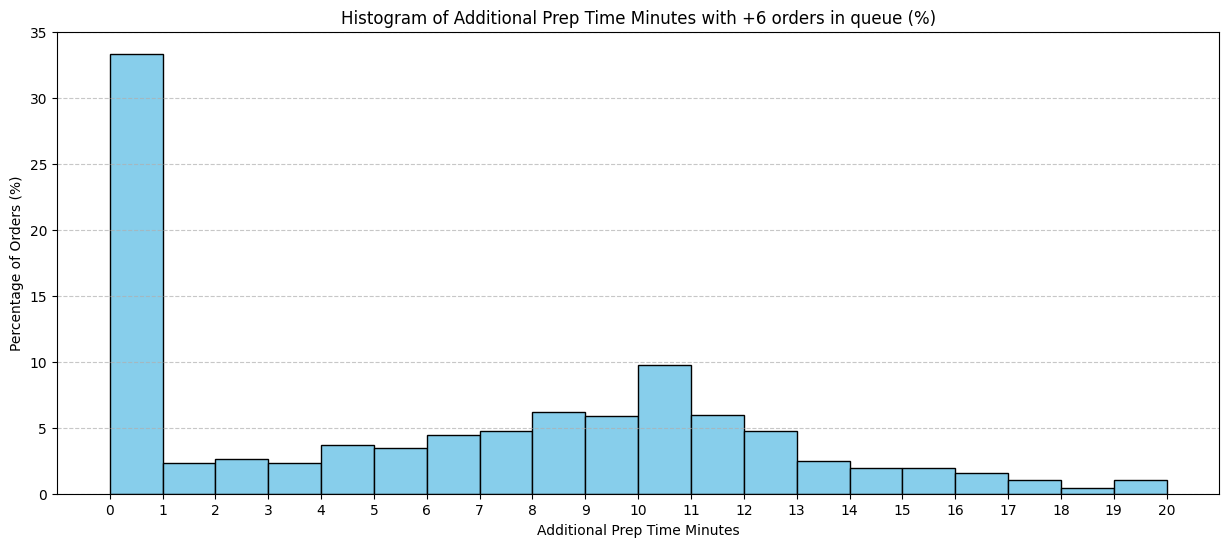

In [63]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['orden_en_cola'] > 5) & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['minutos_adicionales_prep_time']>=0) & (dfaux['minutos_adicionales_prep_time']<=20) & (dfaux['strategy']=="no_cambio")  ]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time'], bins=20, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.xticks(np.arange(0, 21, 1))
plt.xlabel('Additional Prep Time Minutes')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Additional Prep Time Minutes with +6 orders in queue (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [64]:
dfaux

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,qty_total_products,confirmed_gmv,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,orden_en_cola,minutos_adicionales_prep_time
421399,Chile,1031.0,Niu Sushi - Tobalaba,sushi,niu,no_cambio,2024-12-16,2024-12-17,12,Tuesday,...,2.0,12480.0,47.0,NaN,0.383333,2024-12-17 12:12:24.745975,2024-12-17 12:59:24.745975,2024-12-17 13:00:45.289409,0,None
437098,Chile,1031.0,Niu Sushi - Tobalaba,sushi,niu,no_cambio,2024-12-16,2024-12-17,12,Tuesday,...,2.0,22030.0,49.0,NaN,12.616667,2024-12-17 12:47:51.833670,2024-12-17 13:36:51.833670,2024-12-17 13:51:45.197226,1,2.0
434266,Chile,1031.0,Niu Sushi - Tobalaba,sushi,niu,no_cambio,2024-12-16,2024-12-17,12,Tuesday,...,9.0,51990.0,49.0,NaN,16.533333,2024-12-17 12:53:51.287233,2024-12-17 13:42:51.287233,2024-12-17 13:59:23.650116,2,2.0
439806,Chile,1031.0,Niu Sushi - Tobalaba,sushi,niu,no_cambio,2024-12-16,2024-12-17,13,Tuesday,...,2.0,21660.0,49.0,NaN,NaN,2024-12-17 13:04:28.486427,2024-12-17 13:53:28.486427,2024-12-17 14:04:31.028854,2,2.0
421109,Chile,1031.0,Niu Sushi - Tobalaba,sushi,niu,no_cambio,2024-12-16,2024-12-17,13,Tuesday,...,3.0,17880.0,49.0,49.000000,0.516667,2024-12-17 13:13:54.024346,2024-12-17 14:02:54.024346,2024-12-17 14:07:06.257235,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864495,Chile,505798.0,Little Caesars Las Vizcachas,pizzas,little caesar's,no_cambio,2024-12-16,2024-12-17,20,Tuesday,...,4.0,32660.0,16.0,13.133333,0.000000,2024-12-17 20:47:32.590777,2024-12-17 21:03:32.590777,2024-12-17 21:00:41.137051,1,0.0
852092,Chile,505798.0,Little Caesars Las Vizcachas,pizzas,little caesar's,no_cambio,2024-12-16,2024-12-17,22,Tuesday,...,1.0,8490.0,16.0,NaN,NaN,2024-12-17 22:31:06.613246,2024-12-17 22:47:06.613246,2024-12-17 23:20:40.578119,0,None
859256,Chile,505798.0,Little Caesars Las Vizcachas,pizzas,little caesar's,no_cambio,2024-12-23,2024-12-24,13,Tuesday,...,2.0,30780.0,17.0,NaN,NaN,2024-12-24 13:54:47.131583,2024-12-24 14:11:47.131583,2024-12-24 14:39:33.409960,0,None
856770,Chile,505798.0,Little Caesars Las Vizcachas,pizzas,little caesar's,no_cambio,2024-12-23,2024-12-24,13,Tuesday,...,2.0,11630.0,14.0,14.000000,8.866667,2024-12-24 14:07:39.938537,2024-12-24 14:21:39.938537,2024-12-24 14:39:36.443299,1,-3.0


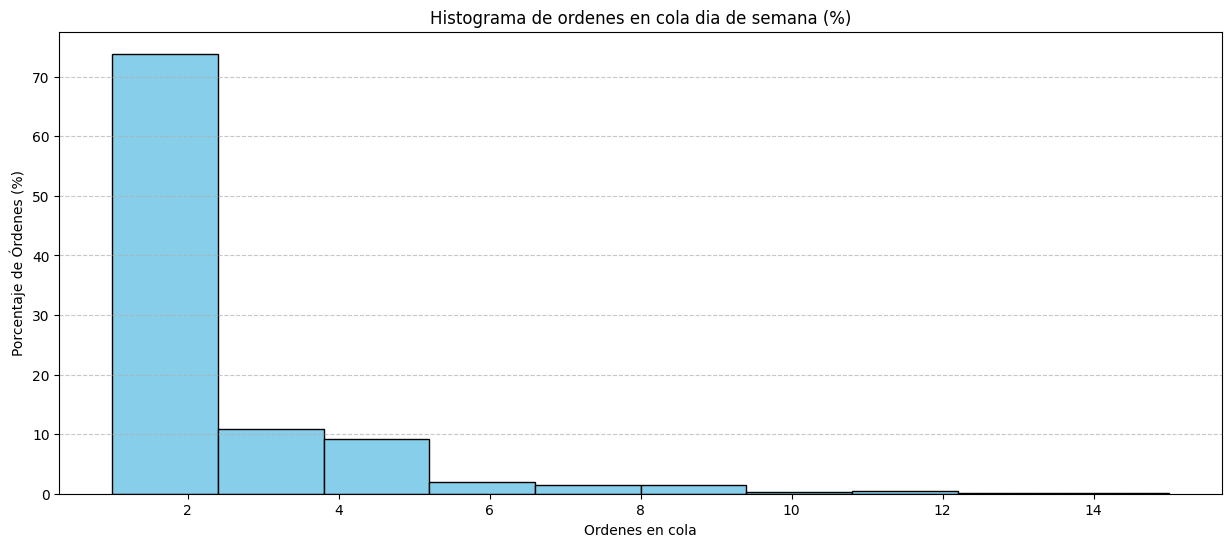

In [65]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['dia_semana'] == "DIA_DE_SEMANA") & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15)   ]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['orden_en_cola'], bins=10, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))

plt.xlabel('Ordenes en cola')
plt.ylabel('Porcentaje de Órdenes (%)')
plt.title('Histograma de ordenes en cola dia de semana (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [66]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['dia_semana'] == "FIN_DE_SEMANA") & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15)   ]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['orden_en_cola'], bins=10, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))

plt.xlabel('Ordenes en cola')
plt.ylabel('Porcentaje de Órdenes (%)')
plt.title('Histograma de ordenes en cola fin de semana (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

ZeroDivisionError: division by zero

<Figure size 1500x600 with 0 Axes>

In [33]:
 dfaux[(dfaux['strategy']=="fijos") ]

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,qty_total_products,confirmed_gmv,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,orden_en_cola,minutos_adicionales_prep_time


In [43]:
#dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-09-30","2024-09-29","2024-09-28","2024-09-27"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")  & (dfaux['franchise_name']=="burger king")   ]
dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-09-30","2024-09-29","2024-09-28","2024-09-27"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")   ]
# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['orden_en_cola'], bins=15, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.ylim(0, 50)
plt.xlabel('Orders in Queue')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Orders in Queue at the End of the Month (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_8908\2719762419.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-09-30","2024-09-29","2024-09-28","2024-09-27"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")   ]


ZeroDivisionError: division by zero

<Figure size 1500x600 with 0 Axes>

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_8908\901366795.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-12-24"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")   ]


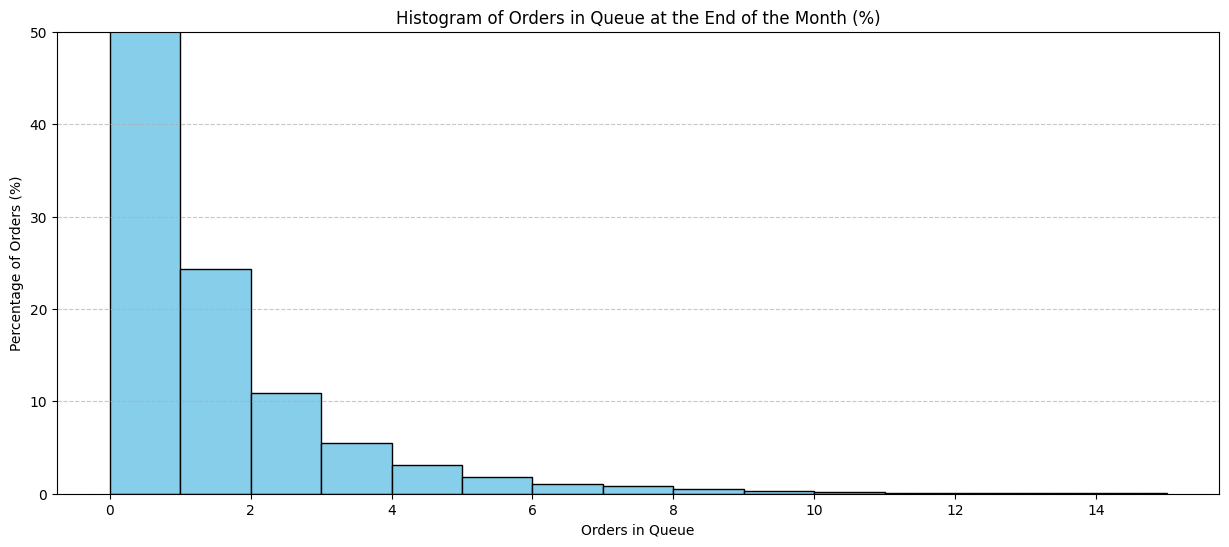

In [67]:
#dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-09-30","2024-09-29","2024-09-28","2024-09-27"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")  & (dfaux['franchise_name']=="burger king")   ]
dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-12-24"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")   ]
# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['orden_en_cola'], bins=15, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.ylim(0, 50)
plt.xlabel('Orders in Queue')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Orders in Queue at the End of the Month (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [68]:
dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')

# Calculamos la frecuencia de cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas = dfaux_con_ordenes_en_cola.groupby('orden_en_cola_agrupada').agg(
    count=('orden_en_cola_agrupada', 'size'),
    avg_ept=('estimated_prep_time', 'mean'),
    avg_at_vendor_time_cleaned=('at_vendor_time_cleaned', 'mean')
).reset_index()

# Calculamos el porcentaje para cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas['percentage'] = (conteo_ordenes_agrupadas['count'] / len(dfaux_con_ordenes_en_cola)) 

# Mostramos la tabla
conteo_ordenes_agrupadas

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_8908\1544413884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')


,orden_en_cola_agrupada,count,avg_ept,avg_at_vendor_time_cleaned,percentage
0,0,10791,14.454453,3.406351,0.511737
1,1,5139,16.054680,4.206001,0.243705
2,2,2290,18.098690,4.719282,0.108598
3,3,1158,19.822107,5.073471,0.054915
4,4,656,21.314024,5.556589,0.031109
5,5+,1053,24.867996,4.914348,0.049936


C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_8908\4125675249.py:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-12-17"]))& (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio") ]


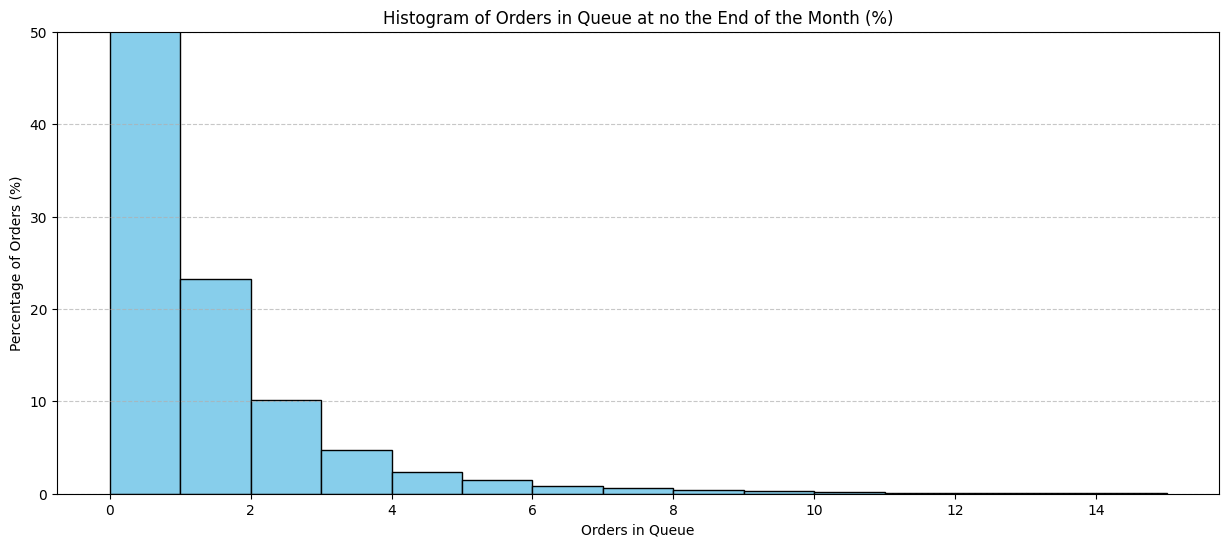

In [69]:
#dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-09-20","2024-09-21","2024-09-22","2024-09-23"]))& (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")   & (dfaux['franchise_name']=="burger king") ]
dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-12-17"]))& (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio") ]
# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['orden_en_cola'], bins=15, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))
plt.ylim(0, 50)
plt.xlabel('Orders in Queue')
plt.ylabel('Percentage of Orders (%)')
plt.title('Histogram of Orders in Queue at no the End of the Month (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [70]:
dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')

# Calculamos la frecuencia de cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas = dfaux_con_ordenes_en_cola.groupby('orden_en_cola_agrupada').agg(
    count=('orden_en_cola_agrupada', 'size'),
    avg_ept=('estimated_prep_time', 'mean'),
    avg_at_vendor_time_cleaned=('at_vendor_time_cleaned', 'mean')
).reset_index()

# Calculamos el porcentaje para cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas['percentage'] = (conteo_ordenes_agrupadas['count'] / len(dfaux_con_ordenes_en_cola))

# Mostramos la tabla
conteo_ordenes_agrupadas

C:\Users\raul.raggio\AppData\Local\Temp\ipykernel_8908\933292675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')


,orden_en_cola_agrupada,count,avg_ept,avg_at_vendor_time_cleaned,percentage
0,0,17565,15.354227,2.605222,0.555450
1,1,7365,17.637067,3.114296,0.232900
2,2,3197,19.299969,3.613490,0.101097
3,3,1486,20.577389,4.033803,0.046991
4,4,755,22.201325,4.046098,0.023875
5,5+,1255,26.085259,4.434086,0.039686


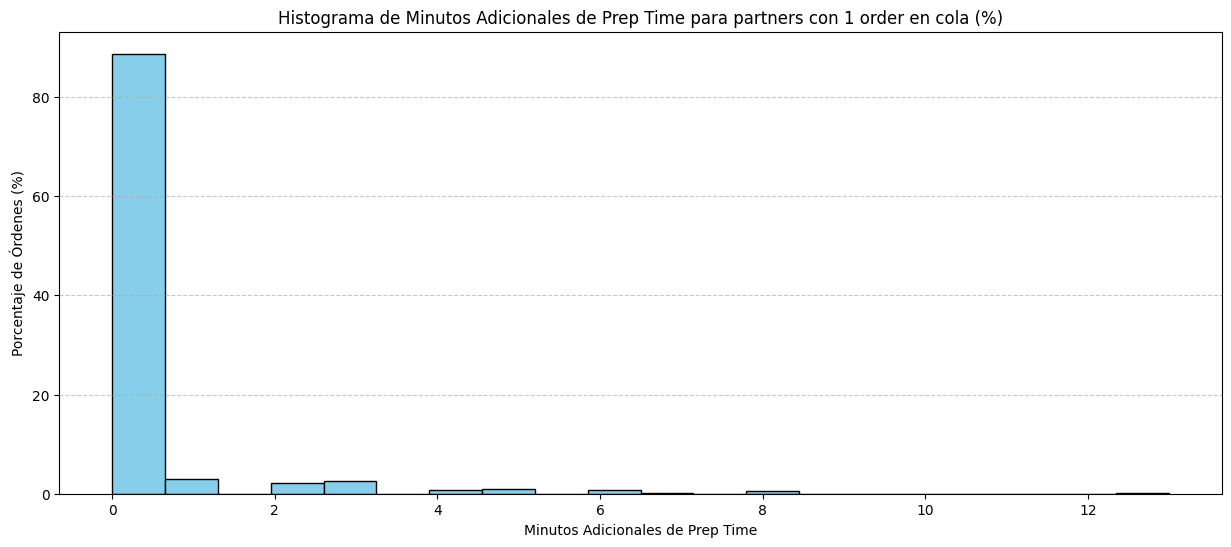

In [26]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'] >= "2024-09-01") & (dfaux['orden_en_cola'] == 1) & (dfaux['minutos_adicionales_prep_time'].notna()) & (dfaux['minutos_adicionales_prep_time']>=0) & (dfaux['minutos_adicionales_prep_time']<=20) & (dfaux['strategy']=="fijos")  ]

# Creamos el histograma
plt.figure(figsize=(15, 6))
plt.hist(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time'], bins=20, color='skyblue', edgecolor='black', weights=(100 / len(dfaux_con_ordenes_en_cola)) * np.ones_like(dfaux_con_ordenes_en_cola['minutos_adicionales_prep_time']))

plt.xlabel('Minutos Adicionales de Prep Time')
plt.ylabel('Porcentaje de Órdenes (%)')
plt.title('Histograma de Minutos Adicionales de Prep Time para partners con 1 order en cola (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [29]:
dfaux_con_ordenes_en_cola

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,confirmed_gmv,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,orden_en_cola,minutos_adicionales_prep_time,orden_en_cola_agrupada
1240450,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,11,Friday,...,16880.0,21.0,18.666667,0.000000,2024-08-16 11:18:11.056728,2024-08-16 11:39:11.056728,2024-08-16 11:36:51.839523,0,None,0
1240536,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,11,Friday,...,11770.0,21.0,20.466667,0.000000,2024-08-16 11:29:15.040302,2024-08-16 11:50:15.040302,2024-08-16 11:49:43.279506,1,0.0,1
1240334,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,12,Friday,...,10440.0,19.0,15.566667,0.000000,2024-08-16 12:17:29.395843,2024-08-16 12:36:29.395843,2024-08-16 12:33:04.273636,0,None,0
1240431,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,12,Friday,...,19380.0,21.0,19.450000,0.000000,2024-08-16 12:48:29.656634,2024-08-16 13:09:29.656634,2024-08-16 13:07:57.475851,0,None,0
1240828,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,12,Friday,...,18710.0,22.0,29.166667,7.183333,2024-08-16 12:57:42.466735,2024-08-16 13:19:42.466735,2024-08-16 13:26:52.846876,1,1.0,1
1240097,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,13,Friday,...,4772.0,19.0,25.083333,6.100000,2024-08-16 13:33:21.520319,2024-08-16 13:52:21.520319,2024-08-16 13:58:27.203209,0,None,0
1241098,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,14,Friday,...,5020.0,19.0,20.200000,1.200000,2024-08-16 14:02:25.050059,2024-08-16 14:21:25.050059,2024-08-16 14:22:37.122992,0,None,0
1240894,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,14,Friday,...,12810.0,21.0,21.000000,4.400000,2024-08-16 14:06:25.850493,2024-08-16 14:27:25.850493,2024-08-16 14:36:30.777580,1,2.0,1
1240322,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,14,Friday,...,7430.0,22.0,25.083333,3.083333,2024-08-16 14:11:20.059933,2024-08-16 14:33:20.059933,2024-08-16 14:36:25.279872,2,3.0,2
1240535,Chile,33438.0,La Ensaladería Gourmet,ensaladas,la ensaladería gourmet,no_cambio,2024-08-12,2024-08-16,14,Friday,...,10280.0,22.0,24.866667,2.866667,2024-08-16 14:14:20.706598,2024-08-16 14:36:20.706598,2024-08-16 14:39:13.022977,3,3.0,3


In [30]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-08-16","2024-08-17","2024-08-18"]))& (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio") & (dfaux['franchise_name']=="la ensaladería gourmet")  ]
dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')
#dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola']

# Calculamos la frecuencia de cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas = dfaux_con_ordenes_en_cola.groupby('orden_en_cola_agrupada').agg(
    count=('orden_en_cola_agrupada', 'size'),
    avg_ept=('estimated_prep_time', 'mean'),
    avg_at_vendor_time_cleaned=('at_vendor_time_cleaned', 'mean')
).reset_index()

# Calculamos el porcentaje para cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas['percentage'] = (conteo_ordenes_agrupadas['count'] / len(dfaux_con_ordenes_en_cola)) * 100

# Mostramos la tabla
conteo_ordenes_agrupadas

/tmp/ipykernel_622/38662191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')


,orden_en_cola_agrupada,count,avg_ept,avg_at_vendor_time_cleaned,percentage
0,0,39,20.282051,2.140541,65.000000
1,1,13,22.384615,2.071212,21.666667
2,2,6,23.333333,3.936111,10.000000
3,3,2,22.000000,1.433333,3.333333


In [31]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-08-30","2024-08-31","2024-09-01"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")& (dfaux['franchise_name']=="la ensaladería gourmet")   ]
dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')
#dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola']
# Calculamos la frecuencia de cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas = dfaux_con_ordenes_en_cola.groupby('orden_en_cola_agrupada').agg(
    count=('orden_en_cola_agrupada', 'size'),
    avg_ept=('estimated_prep_time', 'mean'),
    avg_at_vendor_time_cleaned=('at_vendor_time_cleaned', 'mean')
).reset_index()

# Calculamos el porcentaje para cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas['percentage'] = (conteo_ordenes_agrupadas['count'] / len(dfaux_con_ordenes_en_cola)) * 100

# Mostramos la tabla
conteo_ordenes_agrupadas

/tmp/ipykernel_622/24698556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')


,orden_en_cola_agrupada,count,avg_ept,avg_at_vendor_time_cleaned,percentage
0,0,35,20.685714,3.614444,47.297297
1,1,18,21.722222,4.291026,24.324324
2,2,11,23.545455,3.929167,14.864865
3,3,5,22.800000,6.405556,6.756757
4,4,4,25.500000,5.961111,5.405405
5,5+,1,27.000000,0.000000,1.351351


In [63]:
dfaux['logistic_orders_created_date_local_date'] = pd.to_datetime(dfaux['logistic_orders_created_date_local_date'])

# Define las condiciones y asigna los valores a la columna 'grupo'
conditions = [
    (dfaux['logistic_orders_created_date_local_date'] >= "2024-08-16") & (dfaux['logistic_orders_created_date_local_date'] <= "2024-08-18"),
    (dfaux['logistic_orders_created_date_local_date'] >= "2024-08-30") & (dfaux['logistic_orders_created_date_local_date'] <= "2024-09-01"),
]

values = ['comparacion', 'cambios']

# Asigna el resultado de np.select directamente a la columna 'grupo'
dfaux['grupo'] = np.select(conditions, values, default='otras_fechas')

In [64]:
dfaux

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,cuisine,franchise_name,strategy,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,...,confirmed_gmv,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,orden_en_cola,minutos_adicionales_prep_time,grupo
276827,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,no_cambio,2024-07-29,2024-08-01,13,Thursday,...,6910.0,6.0,6.700000,0.700000,2024-08-01 13:35:38.911531,2024-08-01 13:41:38.911531,2024-08-01 13:42:21.454646,0,None,otras_fechas
281819,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,no_cambio,2024-07-29,2024-08-01,16,Thursday,...,4640.0,6.0,7.366667,1.366667,2024-08-01 16:59:38.298550,2024-08-01 17:05:38.298550,2024-08-01 17:07:00.388510,0,None,otras_fechas
282779,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,no_cambio,2024-07-29,2024-08-03,11,Saturday,...,12300.0,6.0,6.166667,0.183333,2024-08-03 11:55:59.029367,2024-08-03 12:01:59.029367,2024-08-03 12:02:09.513823,0,None,otras_fechas
257635,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,no_cambio,2024-07-29,2024-08-03,14,Saturday,...,12510.0,7.0,7.966667,0.983333,2024-08-03 14:54:08.155235,2024-08-03 15:01:08.155235,2024-08-03 15:02:06.901375,0,None,otras_fechas
271040,Chile,77.0,Subway Parque Arauco - 41767,sándwiches,subway,no_cambio,2024-07-29,2024-08-04,13,Sunday,...,21410.0,9.0,16.183333,7.200000,2024-08-04 13:16:03.391178,2024-08-04 13:25:03.391178,2024-08-04 13:32:15.308596,0,None,otras_fechas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578492,Chile,516549.0,La Rikissima Comidas Rápidas,sándwiches,no franchise,none,2024-09-02,2024-09-04,19,Wednesday,...,15560.0,15.0,18.566667,3.566667,2024-09-04 20:07:03.457974,2024-09-04 20:22:03.457974,2024-09-04 20:25:37.675414,0,None,otras_fechas
2175423,Chile,516685.0,Poked - Linares 968,no-cuisine,no franchise,none,2024-09-02,2024-09-05,21,Thursday,...,15570.0,14.0,20.050000,6.050000,2024-09-05 21:15:14.231329,2024-09-05 21:29:14.231329,2024-09-05 21:35:17.479218,0,None,otras_fechas
1560561,Chile,516718.0,Dunkin' - Chamisero,no-cuisine,dunkin donuts,none,2024-09-02,2024-09-05,18,Thursday,...,12200.0,14.0,NaN,NaN,2024-09-05 18:54:21.757332,2024-09-05 19:08:21.757332,2024-09-05 19:15:17.761067,0,None,otras_fechas
1580751,Chile,516718.0,Dunkin' - Chamisero,no-cuisine,dunkin donuts,none,2024-09-02,2024-09-05,19,Thursday,...,33950.0,15.0,15.000000,9.116667,2024-09-05 19:38:24.635089,2024-09-05 19:53:24.635089,2024-09-05 20:02:51.291957,0,None,otras_fechas


In [66]:
dfaux_con_ordenes_en_cola = dfaux[(dfaux['orden_en_cola']==0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio") & (dfaux['grupo'].isin(["cambios","comparacion"]))  ]
dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')
#dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola']

# Calculamos la frecuencia de cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas = dfaux_con_ordenes_en_cola.groupby(['franchise_name','grupo']).agg(
    count=('orden_en_cola_agrupada', 'size'),
    avg_ept=('estimated_prep_time', 'mean'),
    avg_at_vendor_time_cleaned=('at_vendor_time_cleaned', 'mean')
).reset_index()

# Calculamos el porcentaje para cada número de órdenes en cola agrupadas
conteo_ordenes_agrupadas['percentage'] = (conteo_ordenes_agrupadas['count'] / len(dfaux_con_ordenes_en_cola)) * 100

conteo_ordenes_agrupadas_reo = conteo_ordenes_agrupadas.pivot(index=['franchise_name'], columns='grupo', values=['count','avg_ept','avg_at_vendor_time_cleaned','percentage'])
conteo_ordenes_agrupadas_reo=conteo_ordenes_agrupadas_reo.reset_index()
conteo_ordenes_agrupadas_reo.columns = conteo_ordenes_agrupadas_reo.columns.map('_'.join)
conteo_ordenes_agrupadas_reo["diff_atvc"]=conteo_ordenes_agrupadas_reo["avg_at_vendor_time_cleaned_cambios"]-conteo_ordenes_agrupadas_reo["avg_at_vendor_time_cleaned_comparacion"]
conteo_ordenes_agrupadas_reo = conteo_ordenes_agrupadas_reo.sort_values(by='diff_atvc', ascending=False)
conteo_ordenes_agrupadas_reo=conteo_ordenes_agrupadas_reo[conteo_ordenes_agrupadas_reo["count_cambios"]>=40]
# Mostramos la tabla
conteo_ordenes_agrupadas_reo.to_csv("colas.csv")
conteo_ordenes_agrupadas_reo

/tmp/ipykernel_901/4169410323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfaux_con_ordenes_en_cola['orden_en_cola_agrupada'] = dfaux_con_ordenes_en_cola['orden_en_cola'].apply(lambda x: x if x < 5 else '5+')


,franchise_name_,count_cambios,count_comparacion,avg_ept_cambios,avg_ept_comparacion,avg_at_vendor_time_cleaned_cambios,avg_at_vendor_time_cleaned_comparacion,percentage_cambios,percentage_comparacion,diff_atvc
244,roof burger,45.0,44.0,23.511111,23.795455,6.594298,3.188889,0.026212,0.025630,3.405409
94,el japonés,43.0,51.0,27.627907,26.901961,8.686752,5.413265,0.025047,0.029707,3.273487
315,yogen fruz,102.0,66.0,12.843137,13.136364,4.829861,1.833333,0.059414,0.038444,2.996528
186,meisushi,46.0,48.0,20.434783,20.750000,5.391852,2.473864,0.026795,0.027959,2.917988
49,carl's jr.,331.0,247.0,18.761329,18.821862,5.077083,2.214375,0.192804,0.143875,2.862708
...,...,...,...,...,...,...,...,...,...,...
55,china noble,58.0,33.0,20.017241,20.181818,1.666667,2.327273,0.033784,0.019222,-0.660606
78,deleite churros,46.0,55.0,18.173913,14.836364,1.575000,2.358163,0.026795,0.032037,-0.783163
90,eko sushi,40.0,38.0,30.100000,29.578947,1.026389,2.196491,0.023300,0.022135,-1.170102
200,mr slice pizza,46.0,36.0,10.217391,9.944444,1.607955,3.384722,0.026795,0.020970,-1.776768


In [55]:
conteo_ordenes_agrupadas

,franchise_name,grupo,count,avg_ept,avg_at_vendor_time_cleaned,percentage
0,+ milas,cambios,38,24.631579,5.233796,0.002113
1,+ milas,comparacion,44,24.681818,5.394583,0.002446
2,+ milas,otras_fechas,295,23.752542,3.092857,0.016401
3,abrakebab,cambios,13,11.153846,3.546154,0.000723
4,abrakebab,comparacion,40,10.550000,2.852315,0.002224
...,...,...,...,...,...,...
943,yakuza sushi,comparacion,120,34.708333,5.222337,0.006671
944,yakuza sushi,otras_fechas,740,33.212162,2.759755,0.041140
945,yogen fruz,cambios,73,13.369863,1.963095,0.004058
946,yogen fruz,comparacion,110,12.981818,4.950000,0.006115


In [ ]:
dfaux_con_ordenes_en_cola2= dfaux[(dfaux['logistic_orders_created_date_local_date'].isin([ "2024-08-30","2024-08-31","2024-09-01"])) & (dfaux['orden_en_cola']>=0)   & (dfaux['orden_en_cola']<=15) & (dfaux['strategy']=="no_cambio")  ]

In [14]:
#filtrar por esstrategia que esten en computed

In [73]:
dfaux.columns

Index(['logistic_orders_country__country_name', 'dim_partner_partner_id',
       'dim_partner_partner_name', 'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_date_local_day_of_week', 'dia_semana',
       'horario', 'peya_order_id', 'qty_total_products', 'confirmed_gmv',
       'estimated_prep_time', 'assumed_prep_time', 'at_vendor_time_cleaned',
       'sent_to_vendor', 'cpu', 'rider_picked_up_at_local', 'orden_en_cola',
       'minutos_adicionales_prep_time'],
      dtype='object')

In [28]:
dfaux33=df1[(df1["logistic_orders_created_at_local_hour_of_day"]==13) & (df1["dia_semana"]=="DIA_DE_SEMANA") & (df1["business_type_name"]=="Restaurant")]
grouped = dfaux33.groupby(['dim_partner_partner_id','dim_partner_partner_name','dia_semana','logistic_orders_created_at_local_hour_of_day']).agg({'estimated_prep_time':'mean','is_vendor_late_10':'sum'  , 'is_vendor_late_nn':'sum' ,'peya_order_id':'nunique','logistic_orders_created_date_local_date':'nunique' })
grouped["%vendor_late"]=grouped["is_vendor_late_10"]/grouped["is_vendor_late_nn"]
grouped["orders_day"]=grouped["peya_order_id"]/grouped["logistic_orders_created_date_local_date"]
prueba=pd.DataFrame(grouped[['estimated_prep_time','%vendor_late','peya_order_id','orders_day']])
prueba=prueba.reset_index()
prueba = prueba.sort_values(by='peya_order_id', ascending=False)
prueba

,dim_partner_partner_id,dim_partner_partner_name,dia_semana,logistic_orders_created_at_local_hour_of_day,estimated_prep_time,%vendor_late,peya_order_id,orders_day
1810,128743.0,McDonald's - San Bernardo,DIA_DE_SEMANA,13,12.009259,0.143836,324,19.058824
2144,139209.0,Cocinería Violeta,DIA_DE_SEMANA,13,15.932624,0.039711,282,16.588235
7060,493918.0,Mcdonald's Chillán Argentina,DIA_DE_SEMANA,13,22.135338,0.134100,265,15.588235
5823,437704.0,Poked - Copiapó.,DIA_DE_SEMANA,13,31.422053,0.171875,263,15.470588
706,65827.0,McDonald's Rancagua Machalí,DIA_DE_SEMANA,13,12.539062,0.041667,254,14.941176
...,...,...,...,...,...,...,...,...
7546,510967.0,Complethor - Talca,DIA_DE_SEMANA,13,15.000000,1.000000,1,1.000000
7547,510991.0,Nagazaki,DIA_DE_SEMANA,13,15.000000,NaN,1,1.000000
7548,511110.0,Mao Sushi - Lo Barnechea,DIA_DE_SEMANA,13,15.000000,0.000000,1,1.000000
7551,511195.0,Kiwisu,DIA_DE_SEMANA,13,15.000000,1.000000,1,1.000000


In [29]:
prueba[(prueba["%vendor_late"]>=0.3) & (prueba["peya_order_id"]>=30)  & (prueba["estimated_prep_time"]>=20)]

,dim_partner_partner_id,dim_partner_partner_name,dia_semana,logistic_orders_created_at_local_hour_of_day,estimated_prep_time,%vendor_late,peya_order_id,orders_day
4746,368648.0,Naturista Healthy Food,DIA_DE_SEMANA,13,24.637931,0.489796,116,6.823529
2673,166713.0,Poked - Talca Ii,DIA_DE_SEMANA,13,26.580357,0.317308,112,6.588235
5427,412858.0,Burger King® - Hernando De Aguirre,DIA_DE_SEMANA,13,24.468468,0.333333,111,6.937500
4095,309300.0,Minami Sushi - Mall La Portada,DIA_DE_SEMANA,13,31.769231,0.400000,104,6.117647
5149,397133.0,Kiri Pokes - Los Ángeles,DIA_DE_SEMANA,13,35.754902,0.360000,102,7.846154
1114,101970.0,El Guatón Sucursal Quilpué,DIA_DE_SEMANA,13,27.227723,0.354167,101,6.312500
763,66559.0,Burger King® - Vitacura,DIA_DE_SEMANA,13,24.934211,0.308824,76,4.750000
4491,343881.0,Little Caesars Pizza La Montaña,DIA_DE_SEMANA,13,23.486486,0.306452,72,4.500000
222,50766.0,Relativo,DIA_DE_SEMANA,13,26.955224,0.333333,67,3.941176
2173,139914.0,Tarragona San Pablo,DIA_DE_SEMANA,13,20.803030,0.327869,66,3.882353


In [30]:
dfaux1=dfaux[(dfaux["dim_partner_partner_id"]==166713) & (dfaux["logistic_orders_created_at_local_hour_of_day"]==13) & (dfaux["dia_semana"].isin(["DIA_DE_SEMANA"]))]
grouped = dfaux1.groupby(['dim_partner_partner_id','dim_partner_partner_name','orden_en_cola']).agg({'estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean'})

prueba=pd.DataFrame(grouped[['estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned']])
prueba=prueba.reset_index()
prueba

,dim_partner_partner_id,dim_partner_partner_name,orden_en_cola,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned
0,166713.0,Poked - Talca Ii,0,23.750000,32.595833,7.800000
1,166713.0,Poked - Talca Ii,1,22.125000,24.495833,4.133333
2,166713.0,Poked - Talca Ii,2,25.045455,26.590196,7.538889
3,166713.0,Poked - Talca Ii,3,26.060606,27.637879,6.977586
4,166713.0,Poked - Talca Ii,4,27.650000,29.869792,5.209167
5,166713.0,Poked - Talca Ii,5,28.916667,34.288333,6.511111
6,166713.0,Poked - Talca Ii,6,31.500000,37.366667,11.855556
7,166713.0,Poked - Talca Ii,7,30.000000,29.041667,7.594444
8,166713.0,Poked - Talca Ii,8,28.000000,NaN,NaN
9,166713.0,Poked - Talca Ii,9,33.000000,37.383333,4.383333


In [59]:
dfaux1=dfaux[(dfaux["dim_partner_partner_id"]==148101.0) & (dfaux["logistic_orders_created_at_local_hour_of_day"]==13) & (dfaux["dia_semana"].isin(["DIA_DE_SEMANA"]))]
grouped = dfaux1.groupby(['dim_partner_partner_id','dim_partner_partner_name','orden_en_cola']).agg({'estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean'})

prueba=pd.DataFrame(grouped[['estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned']])
prueba=prueba.reset_index()
prueba

,dim_partner_partner_id,dim_partner_partner_name,orden_en_cola,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned
0,148101.0,McDonald's - Puente Alto,0,11.800000,11.143333,8.364444
1,148101.0,McDonald's - Puente Alto,1,11.307692,14.390000,10.217949
2,148101.0,McDonald's - Puente Alto,2,13.700000,16.019444,10.454630
3,148101.0,McDonald's - Puente Alto,3,15.384615,11.616667,8.583333
4,148101.0,McDonald's - Puente Alto,4,15.857143,18.058333,7.621429
5,148101.0,McDonald's - Puente Alto,5,16.500000,14.411111,4.262500
6,148101.0,McDonald's - Puente Alto,6,19.000000,15.383333,0.000000


In [47]:
dfaux1=dfaux[(dfaux["dim_partner_partner_id"]==435681) & (dfaux["logistic_orders_created_at_local_hour_of_day"]==13) & (dfaux["logistic_orders_created_date_local_day_of_week"].isin(["Wednesday"]))]
grouped = dfaux1.groupby(['dim_partner_partner_id','dim_partner_partner_name','orden_en_cola']).agg({'estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean'})

prueba=pd.DataFrame(grouped[['estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned']])
prueba=prueba.reset_index()
prueba

,dim_partner_partner_id,dim_partner_partner_name,orden_en_cola,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned
0,435681.0,KFC Guardia Vieja,0,20.000000,31.650000,8.966667
1,435681.0,KFC Guardia Vieja,1,14.250000,25.244444,7.050000
2,435681.0,KFC Guardia Vieja,2,15.500000,22.491667,12.013333
3,435681.0,KFC Guardia Vieja,3,17.666667,15.825000,9.638889
4,435681.0,KFC Guardia Vieja,4,19.000000,26.400000,6.125000


In [48]:
dfaux1=dfaux[(dfaux["dim_partner_partner_id"]==404203) & (dfaux["logistic_orders_created_at_local_hour_of_day"]==13)  & (dfaux["logistic_orders_created_date_local_day_of_week"].isin(["Wednesday"]))]
grouped = dfaux1.groupby(['dim_partner_partner_id','dim_partner_partner_name','orden_en_cola']).agg({'estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean'})

prueba=pd.DataFrame(grouped[['estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned']])
prueba=prueba.reset_index()
prueba

,dim_partner_partner_id,dim_partner_partner_name,orden_en_cola,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned
0,404203.0,Street Wrap - Apoquindo,0,20.5,35.716667,14.125000
1,404203.0,Street Wrap - Apoquindo,1,23.0,NaN,4.566667
2,404203.0,Street Wrap - Apoquindo,2,22.0,31.825000,9.225000
3,404203.0,Street Wrap - Apoquindo,3,24.0,38.833333,12.450000
4,404203.0,Street Wrap - Apoquindo,4,25.0,35.933333,10.950000


In [44]:
dfaux

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,dia_semana,horario,peya_order_id,qty_total_products,confirmed_gmv,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,sent_to_vendor,cpu,rider_picked_up_at_local,orden_en_cola
242787,Chile,77.0,Subway Parque Arauco - 41767,2024-07-29,2024-08-01,13,Thursday,DIA_DE_SEMANA,12-14,1246157886,1.0,6910.0,6.0,6.700000,0.700000,2024-08-01 13:35:38.911531,2024-08-01 13:41:38.911531,2024-08-01 13:42:21.454646,0
245280,Chile,77.0,Subway Parque Arauco - 41767,2024-07-29,2024-08-01,16,Thursday,DIA_DE_SEMANA,15-18,1246306893,1.0,4640.0,6.0,7.366667,1.366667,2024-08-01 16:59:38.298550,2024-08-01 17:05:38.298550,2024-08-01 17:07:00.388510,0
262939,Chile,77.0,Subway Parque Arauco - 41767,2024-07-29,2024-08-03,11,Saturday,FIN_DE_SEMANA,8-11,1247673598,1.0,12300.0,6.0,6.166667,0.183333,2024-08-03 11:55:59.029367,2024-08-03 12:01:59.029367,2024-08-03 12:02:09.513823,0
238206,Chile,77.0,Subway Parque Arauco - 41767,2024-07-29,2024-08-03,14,Saturday,FIN_DE_SEMANA,12-14,1247925202,2.0,12510.0,7.0,7.966667,0.983333,2024-08-03 14:54:08.155235,2024-08-03 15:01:08.155235,2024-08-03 15:02:06.901375,0
253293,Chile,77.0,Subway Parque Arauco - 41767,2024-07-29,2024-08-04,13,Sunday,FIN_DE_SEMANA,12-14,1248733429,3.0,21410.0,9.0,16.183333,7.200000,2024-08-04 13:16:03.391178,2024-08-04 13:25:03.391178,2024-08-04 13:32:15.308596,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2533738,Chile,516299.0,Cook Studio Chacabuco,2024-08-26,2024-08-31,13,Saturday,FIN_DE_SEMANA,12-14,1271059185,1.0,7130.0,15.0,13.700000,0.000000,2024-08-31 13:14:49.377919,2024-08-31 13:29:49.377919,2024-08-31 13:28:32.223047,0
2409115,Chile,516299.0,Cook Studio Chacabuco,2024-08-26,2024-08-31,13,Saturday,FIN_DE_SEMANA,12-14,1271115773,2.0,8445.0,15.0,15.000000,1.483333,2024-08-31 13:59:53.839395,2024-08-31 14:14:53.839395,2024-08-31 14:19:31.225244,0
1743173,Chile,516299.0,Cook Studio Chacabuco,2024-08-26,2024-08-31,14,Saturday,FIN_DE_SEMANA,12-14,1271151772,6.0,36775.0,15.0,30.283333,15.283333,2024-08-31 14:58:17.877434,2024-08-31 15:13:17.877434,2024-08-31 15:28:35.244330,0
1912125,Chile,516299.0,Cook Studio Chacabuco,2024-08-26,2024-08-31,15,Saturday,FIN_DE_SEMANA,15-18,1271153549,2.0,13270.0,14.0,21.983333,8.000000,2024-08-31 15:08:16.269973,2024-08-31 15:22:16.269973,2024-08-31 15:30:15.996302,1


In [16]:
dfaux[dfaux["orden_en_cola"]>=20]

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,peya_order_id,qty_total_products,confirmed_gmv,estimated_prep_time,sent_to_vendor,cpu,rider_picked_up_at_local,orden_en_cola
1393873,Chile,61502,Minami Sushi Grecia,2024-08-05,2024-08-11,20,Sunday,1254961707,6,44380.0,43.0,2024-08-11 20:33:30.820487,2024-08-11 21:16:30.820487,2024-08-11 21:34:48.368960,20
1451827,Chile,61502,Minami Sushi Grecia,2024-08-05,2024-08-11,20,Sunday,1254961898,1,9820.0,43.0,2024-08-11 20:34:32.831440,2024-08-11 21:17:32.831440,2024-08-11 22:24:53.792300,21
1333205,Chile,61502,Minami Sushi Grecia,2024-08-05,2024-08-11,20,Sunday,1255013176,1,11020.0,43.0,2024-08-11 20:40:30.549896,2024-08-11 21:23:30.549896,2024-08-11 21:41:15.501210,20
990369,Chile,61502,Minami Sushi Grecia,2024-08-05,2024-08-11,20,Sunday,1255035223,2,20850.0,43.0,2024-08-11 20:41:33.923397,2024-08-11 21:24:33.923397,2024-08-11 21:43:25.477882,21
1415288,Chile,61502,Minami Sushi Grecia,2024-08-05,2024-08-11,20,Sunday,1255035380,2,0.0,43.0,2024-08-11 20:41:33.970147,2024-08-11 21:24:33.970147,2024-08-11 21:28:10.043627,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392820,Chile,493918,Mcdonald's Chillán Argentina,2024-08-05,2024-08-05,20,Monday,1249927991,1,5890.0,33.0,2024-08-05 20:06:42.166300,2024-08-05 20:39:42.166300,2024-08-05 20:45:09.197643,20
438549,Chile,493918,Mcdonald's Chillán Argentina,2024-08-05,2024-08-05,20,Monday,1249928394,4,20570.0,40.0,2024-08-05 20:09:14.162753,2024-08-05 20:49:14.162753,2024-08-05 20:50:29.182303,21
374162,Chile,493918,Mcdonald's Chillán Argentina,2024-08-05,2024-08-05,20,Monday,1249949666,1,5590.0,36.0,2024-08-05 20:10:52.259728,2024-08-05 20:46:52.259728,2024-08-05 20:47:51.553238,21
341169,Chile,493918,Mcdonald's Chillán Argentina,2024-08-05,2024-08-05,20,Monday,1249929170,1,4290.0,38.0,2024-08-05 20:14:12.672838,2024-08-05 20:52:12.672838,2024-08-05 20:50:17.215567,22


In [41]:
dfaux[(dfaux["dim_partner_partner_id"]==507733) & (dfaux["logistic_orders_created_date_local_date"].isin(["2024-08-11"])) & (dfaux["logistic_orders_created_at_local_hour_of_day"].isin([20,21]))]

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,logistic_orders_created_at_local_hour_of_day,logistic_orders_created_date_local_day_of_week,peya_order_id,estimated_prep_time,sent_to_vendor,cpu,rider_picked_up_at_local,orden_en_cola
56208,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254933213,13.0,2024-08-11 20:03:48.068126,2024-08-11 20:16:48.068126,2024-08-11 20:11:45.569170,2.0
56219,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254935400,17.0,2024-08-11 20:10:47.153859,2024-08-11 20:27:47.153859,2024-08-11 20:29:20.794073,3.0
56204,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254957326,17.0,2024-08-11 20:11:47.139610,2024-08-11 20:28:47.139610,2024-08-11 20:29:18.404525,1.0
56210,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254955568,14.0,2024-08-11 20:11:48.140751,2024-08-11 20:25:48.140751,2024-08-11 20:22:36.524189,2.0
56212,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254955587,16.0,2024-08-11 20:11:48.164629,2024-08-11 20:27:48.164629,2024-08-11 20:22:24.217906,3.0
56198,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254958573,16.0,2024-08-11 20:21:47.277506,2024-08-11 20:37:47.277506,2024-08-11 20:42:37.873817,4.0
56217,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254937947,15.0,2024-08-11 20:23:47.281053,2024-08-11 20:38:47.281053,2024-08-11 20:44:35.315962,3.0
56206,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1254937998,17.0,2024-08-11 20:23:47.323248,2024-08-11 20:40:47.323248,2024-08-11 20:44:39.433339,4.0
56199,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1255011381,16.0,2024-08-11 20:30:47.609650,2024-08-11 20:46:47.609650,2024-08-11 20:56:34.265132,3.0
56205,Chile,507733,McDonald´s - Liray,2024-08-05,2024-08-11,20,Sunday,1255035571,18.0,2024-08-11 20:42:47.767643,2024-08-11 21:00:47.767643,2024-08-11 21:25:38.424526,3.0


In [44]:
dfaux=df1[(df1["business_type_name"].isin(["Restaurant","Coffee"])) & (df1["franchise_name"].isin(["melt pizzas"]))]
grouped = dfaux.groupby(['logistic_orders_country__country_name','dim_partner_partner_id','dim_partner_partner_name','logistic_orders_created_date_local_day_of_week','horario','city']).agg({'slow_delivery':'sum','is_vendor_late_10': 'sum', 'is_vendor_late_nn': 'sum','is_rider_late_10':'sum','is_rider_late_nn':'sum','estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean','order_id': 'nunique','ept_atvc':'mean','actual_delivery_time':'mean'})
grouped = grouped.rename(columns={'order_id': 'Orders'})
grouped['%vendorlate'] =grouped['is_vendor_late_10'] / grouped['is_vendor_late_nn']
grouped['%riderlate'] =grouped['is_rider_late_10'] / grouped['is_rider_late_nn']
grouped['%slowdelivery'] =grouped['slow_delivery'] / grouped['Orders']


prueba=pd.DataFrame(grouped[['%slowdelivery','%vendorlate','%riderlate','estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned','Orders','ept_atvc','actual_delivery_time']])
prueba=prueba.reset_index()
prueba.to_csv("info_melt.csv")
prueba

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,logistic_orders_created_date_local_day_of_week,horario,city,%slowdelivery,%vendorlate,%riderlate,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,Orders,ept_atvc,actual_delivery_time
0,Chile,87778.0,Melt Pizzas - Macul,Friday,12-14,Santiago,0.227273,0.238095,0.045455,26.681818,28.106667,4.891270,22,31.653175,38.099242
1,Chile,87778.0,Melt Pizzas - Macul,Friday,15-18,Santiago,0.272727,0.097561,0.068182,26.659091,26.031373,3.014634,44,29.526829,39.774621
2,Chile,87778.0,Melt Pizzas - Macul,Friday,19-23,Santiago,0.388235,0.205882,0.180723,28.694118,30.574859,5.371814,85,33.812990,47.179608
3,Chile,87778.0,Melt Pizzas - Macul,Friday,8-11,Santiago,0.200000,0.200000,0.000000,25.000000,21.333333,5.383333,5,30.383333,37.380000
4,Chile,87778.0,Melt Pizzas - Macul,Monday,12-14,Santiago,0.111111,0.111111,0.000000,24.888889,23.064815,0.855556,9,25.744444,33.414815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Chile,385448.0,Melt Pizzas - Antofagasta2,Tuesday,8-11,Antofagasta,0.000000,0.000000,0.000000,27.500000,27.500000,3.741667,2,31.241667,41.075000
1251,Chile,385448.0,Melt Pizzas - Antofagasta2,Wednesday,12-14,Antofagasta,0.333333,0.218750,0.030303,27.060606,30.264744,5.946354,33,33.415104,43.353030
1252,Chile,385448.0,Melt Pizzas - Antofagasta2,Wednesday,15-18,Antofagasta,0.547619,0.194444,0.142857,25.404762,29.306173,6.875000,42,33.208333,48.827778
1253,Chile,385448.0,Melt Pizzas - Antofagasta2,Wednesday,19-23,Antofagasta,0.514286,0.306818,0.120000,26.961905,32.515104,10.405495,105,38.790110,52.739841


In [10]:
dfaux=df1[(df1["business_type_name"].isin(["Restaurant","Coffee"])) & (df1["franchise_name"].isin(["melt pizzas"]))]
grouped = dfaux.groupby(['logistic_orders_country__country_name','dim_partner_partner_id','dim_partner_partner_name','logistic_orders_created_date_local_week','logistic_orders_created_date_local_day_of_week','horario']).agg({'estimated_prep_time':'mean'})


prueba=pd.DataFrame(grouped[['estimated_prep_time']])
prueba=prueba.reset_index()
prueba

,logistic_orders_country__country_name,dim_partner_partner_id,dim_partner_partner_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_day_of_week,horario,estimated_prep_time
0,Chile,87778.0,Melt Pizzas - Macul,2024-07-01,Friday,12-14,25.666667
1,Chile,87778.0,Melt Pizzas - Macul,2024-07-01,Friday,15-18,26.500000
2,Chile,87778.0,Melt Pizzas - Macul,2024-07-01,Friday,19-23,27.692308
3,Chile,87778.0,Melt Pizzas - Macul,2024-07-01,Friday,8-11,25.000000
4,Chile,87778.0,Melt Pizzas - Macul,2024-07-01,Monday,12-14,24.000000
...,...,...,...,...,...,...,...
5941,Chile,385448.0,Melt Pizzas - Antofagasta2,2024-08-05,Tuesday,19-23,30.500000
5942,Chile,385448.0,Melt Pizzas - Antofagasta2,2024-08-05,Wednesday,12-14,29.200000
5943,Chile,385448.0,Melt Pizzas - Antofagasta2,2024-08-05,Wednesday,15-18,31.166667
5944,Chile,385448.0,Melt Pizzas - Antofagasta2,2024-08-05,Wednesday,19-23,30.727273


In [33]:
dfaux=df1[(df1["business_type_name"].isin(["Restaurant","Coffee"])) & (df1["franchise_name"].isin(["melt pizzas"])) & (df1["dim_partner_partner_id"].isin([87778])) & (df1["logistic_orders_created_date_local_date"].isin(["2024-08-05"])) & (df1["logistic_orders_created_at_local_hour_of_day"].isin([19]))]
dfaux.to_csv("revisar.csv")
dfaux

,Unnamed: 0,logistic_orders_country__country_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,dim_partner_partner_name,dim_partner_partner_id,order_id,order_status,logistic_orders_created_date_local_day_of_week,logistic_orders_created_at_local_hour_of_day,...,rider_late_min,hold_back_time_min,estimated_walk_in_min,estimated_walk_out_min,to_customer_time_min,month,ept_atvc,horario,dia_semana,grupo
658584,658584,Chile,2024-08-05,2024-08-05,Melt Pizzas - Macul,87778.0,118650560,completed,Monday,19,...,5.766667,0.366667,3.017,2.683,8.750000,8,32.833333,19-23,DIA_DE_SEMANA,otras_fechas
1428851,1428851,Chile,2024-08-05,2024-08-05,Melt Pizzas - Macul,87778.0,118655228,completed,Monday,19,...,23.933333,0.566667,3.017,2.683,18.366667,8,NaN,19-23,DIA_DE_SEMANA,otras_fechas


In [22]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'dim_partner_partner_name',
       'dim_partner_partner_id', 'order_id', 'order_status',
       'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'at_vendor_time_cleaned',
       'at_vendor_time', 'assumed_prep_time', 'promised_delivery_time',
       'actual_delivery_time', 'vendor_late_min', 'rider_late_min',
       'hold_back_time_min', 'estimated_walk_in_min', 'estimated_walk_out_min',
       'to_customer_time_min', 'month', 'ept_atvc', 'horario', 'dia_semana',
       'grupo'],
      dtype='object')

In [16]:
dfaux=df1[(df1["Limite Prep Time Cuisine"]<df1["estimated_prep_time"] ) & (df1["business_type_name"].isin(["Restaurant","Coffee"]))]
grouped = dfaux.groupby(['logistic_orders_country__country_name']).agg({'slow_delivery':'sum','is_vendor_late_10': 'sum', 'is_vendor_late_nn': 'sum','is_rider_late_10':'sum','is_rider_late_nn':'sum','estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean','order_id': 'nunique','ept_atvc':'mean','actual_delivery_time':'mean'})
grouped = grouped.rename(columns={'order_id': 'Orders'})
grouped['%vendorlate'] =grouped['is_vendor_late_10'] / grouped['is_vendor_late_nn']
grouped['%riderlate'] =grouped['is_rider_late_10'] / grouped['is_rider_late_nn']
grouped['%slowdelivery'] =grouped['slow_delivery'] / grouped['Orders']


prueba=pd.DataFrame(grouped[['%slowdelivery','%vendorlate','%riderlate','estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned','Orders','ept_atvc','actual_delivery_time']])
prueba=prueba.reset_index()
prueba

,logistic_orders_country__country_name,%slowdelivery,%vendorlate,%riderlate,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,Orders,ept_atvc,actual_delivery_time
0,Chile,0.570615,0.255138,0.092498,31.157435,32.937225,6.194904,260095,37.303398,49.690047


In [17]:
dfaux=df1[(df1["business_type_name"].isin(["Restaurant","Coffee"]))]
grouped = dfaux.groupby(['dim_partner_partner_id']).agg({'slow_delivery':'sum','is_vendor_late_10': 'sum', 'is_vendor_late_nn': 'sum','is_rider_late_10':'sum','is_rider_late_nn':'sum','estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean','at_vendor_time_cleaned':'mean','order_id': 'nunique','ept_atvc':'mean','actual_delivery_time':'mean'})


prueba=pd.DataFrame(grouped[['at_vendor_time_cleaned']])
prueba=prueba.reset_index()
parnters=prueba.copy()
parnters

,dim_partner_partner_id,at_vendor_time_cleaned
0,77.0,2.179167
1,828.0,1.924431
2,849.0,2.153604
3,858.0,3.080000
4,1031.0,2.940551
...,...,...
12908,508920.0,4.700000
12909,508945.0,2.863333
12910,508971.0,9.958333
12911,509056.0,3.083333


In [18]:
df12 = pd.merge(df1, parnters, how='left', left_on='dim_partner_partner_id', right_on='dim_partner_partner_id')
df12=df12[(df12["business_type_name"].isin(["Restaurant","Coffee"]))]
df12

,Unnamed: 0,logistic_orders_country__country_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,dim_partner_partner_name,dim_partner_partner_id,order_id,order_status,logistic_orders_created_date_local_day_of_week,logistic_orders_created_at_local_hour_of_day,...,estimated_walk_in_min,estimated_walk_out_min,to_customer_time_min,month,ept_atvc,horario,dia_semana,grupo,Limite Prep Time Cuisine,at_vendor_time_cleaned_y
1,1,Chile,2024-07-01,2024-07-05,Melt Pizzas - Vitacura,160242.0,116085634,completed,Friday,15,...,3.033,2.200,14.400000,7,NaN,15-17,FIN_DE_SEMANA,cambios,30.0,4.767288
3,3,Chile,2024-07-01,2024-07-07,McDonald's Cantagallo,67451.0,116318429,completed,Sunday,18,...,2.733,2.217,11.533333,7,10.000000,18-20,FIN_DE_SEMANA,cambios,26.0,3.508879
4,4,Chile,2024-06-03,2024-06-05,Fuente Suiza Ñuñoa,6212.0,113617814,completed,Wednesday,19,...,2.600,2.250,10.083333,6,31.000000,18-20,DIA_DE_SEMANA,otras_fechas,25.0,3.203991
6,6,Chile,2024-07-08,2024-07-09,Subway Gerónimo De Alderete,57779.0,116420869,completed,Tuesday,10,...,2.800,2.267,5.450000,7,15.533333,8-11,DIA_DE_SEMANA,cambios,26.0,3.319100
7,7,Chile,2024-07-01,2024-07-01,McDonald's - Kennedy,63530.0,115793234,completed,Monday,19,...,2.817,2.333,17.700000,7,10.850000,18-20,DIA_DE_SEMANA,cambios,26.0,3.923970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292225,4292225,Chile,2024-05-27,2024-06-01,Starbucks Coffee Machalí,170346.0,113202316,completed,Saturday,12,...,3.317,2.033,0.216667,6,17.016667,12-14,FIN_DE_SEMANA,otras_fechas,19.0,3.286478
4292226,4292226,Chile,2024-07-15,2024-07-17,Kawari Sushi,444733.0,117157243,completed,Wednesday,21,...,1.150,2.767,5.583333,7,55.316667,21-23,DIA_DE_SEMANA,cambios,60.0,7.685113
4292227,4292227,Chile,2024-05-27,2024-06-01,Kawari Sushi,444733.0,113258475,completed,Saturday,18,...,1.250,2.817,NaN,6,41.066667,18-20,FIN_DE_SEMANA,otras_fechas,60.0,7.685113
4292228,4292228,Chile,2024-06-24,2024-06-29,Kerlys Fast Food,459413.0,115600621,completed,Saturday,19,...,1.167,2.800,6.116667,6,29.583333,18-20,FIN_DE_SEMANA,otras_fechas,26.0,4.145113


In [19]:
import numpy as np

# Crear la nueva columna 'nuevo_prep_time' basada en la condición dada
df12['nuevo_prep_time'] = np.where(df12['Limite Prep Time Cuisine'] < df12['estimated_prep_time'], 
                                   df12['Limite Prep Time Cuisine'], 
                                   df12['estimated_prep_time'])

In [20]:
df12['nuevo_delivery_time'] = np.where(df12['Limite Prep Time Cuisine'] < df12['estimated_prep_time'], 
                                       df12['actual_delivery_time'] - (df12['estimated_prep_time'] - df12['nuevo_prep_time']), 
                                       df12['actual_delivery_time'])

In [21]:
df12['nuevo_slow_delivery'] = np.where(df12['nuevo_delivery_time'] > 45, 1, 0)

In [22]:
df12['nuevo_delivery_time_duplicado_avtc'] = np.where(
    df12['Limite Prep Time Cuisine'] < df12['estimated_prep_time'],
    df12['nuevo_delivery_time'] + df12['at_vendor_time_cleaned_x'],
    df12['nuevo_delivery_time']
)
df12['nuevo_slow_delivery_duplicado_avtc'] = np.where(df12['nuevo_delivery_time_duplicado_avtc'] > 45, 1, 0)

In [23]:
df12['nuevo_delivery_time_duplicado_avtc_partner'] = np.where(
    df12['Limite Prep Time Cuisine'] < df12['estimated_prep_time'],
    df12['nuevo_delivery_time'] + df12['at_vendor_time_cleaned_y'],
    df12['nuevo_delivery_time']
)
df12['nuevo_slow_delivery_duplicado_avtc_partner'] = np.where(df12['nuevo_delivery_time_duplicado_avtc_partner'] > 45, 1, 0)

In [27]:
dfaux=df12
grouped = dfaux.groupby(['logistic_orders_country__country_name']).agg({'slow_delivery':'sum','nuevo_slow_delivery':'sum','nuevo_slow_delivery_duplicado_avtc':'sum','nuevo_slow_delivery_duplicado_avtc_partner':'sum','is_vendor_late_10': 'sum', 'is_vendor_late_nn': 'sum','is_rider_late_10':'sum','is_rider_late_nn':'sum','estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned_x':'mean','order_id': 'nunique','ept_atvc':'mean','actual_delivery_time':'mean','nuevo_delivery_time':'mean','nuevo_delivery_time_duplicado_avtc':'mean','nuevo_delivery_time_duplicado_avtc_partner':'mean'})
grouped = grouped.rename(columns={'order_id': 'Orders'})
grouped['%vendorlate'] =grouped['is_vendor_late_10'] / grouped['is_vendor_late_nn']
grouped['%riderlate'] =grouped['is_rider_late_10'] / grouped['is_rider_late_nn']
grouped['%slowdelivery'] =grouped['slow_delivery'] / grouped['Orders']
grouped['%nuevo_slow_delivery'] =grouped['nuevo_slow_delivery'] / grouped['Orders']
grouped['%nuevo_slow_delivery_duplicado_avtc'] =grouped['nuevo_slow_delivery_duplicado_avtc'] / grouped['Orders']
grouped['%nuevo_slow_delivery_duplicado_avtc_partner'] =grouped['nuevo_slow_delivery_duplicado_avtc_partner'] / grouped['Orders']



prueba=pd.DataFrame(grouped[['%slowdelivery','%vendorlate','%riderlate','estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned_x','Orders','ept_atvc','actual_delivery_time','%nuevo_slow_delivery','%nuevo_slow_delivery_duplicado_avtc','%nuevo_slow_delivery_duplicado_avtc_partner','nuevo_delivery_time','nuevo_delivery_time_duplicado_avtc','nuevo_delivery_time_duplicado_avtc_partner']])
prueba=prueba.reset_index()
prueba

,logistic_orders_country__country_name,%slowdelivery,%vendorlate,%riderlate,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned_x,Orders,ept_atvc,actual_delivery_time,%nuevo_slow_delivery,%nuevo_slow_delivery_duplicado_avtc,%nuevo_slow_delivery_duplicado_avtc_partner,nuevo_delivery_time,nuevo_delivery_time_duplicado_avtc,nuevo_delivery_time_duplicado_avtc_partner
0,Chile,0.212999,0.138223,0.062716,18.601102,19.113602,3.846858,3472512,22.242895,34.532124,0.202866,0.204148,0.216272,34.196455,34.375554,34.618058


In [25]:
df12

,Unnamed: 0,logistic_orders_country__country_name,logistic_orders_created_date_local_week,logistic_orders_created_date_local_date,dim_partner_partner_name,dim_partner_partner_id,order_id,order_status,logistic_orders_created_date_local_day_of_week,logistic_orders_created_at_local_hour_of_day,...,grupo,Limite Prep Time Cuisine,at_vendor_time_cleaned_y,nuevo_prep_time,nuevo_delivery_time,nuevo_slow_delivery,nuevo_delivery_time_duplicado_avtc,nuevo_slow_delivery_duplicado_avtc,nuevo_delivery_time_duplicado_avtc_partner,nuevo_slow_delivery_duplicado_avtc_partner
1,1,Chile,2024-07-01,2024-07-05,Melt Pizzas - Vitacura,160242.0,116085634,completed,Friday,15,...,cambios,30.0,4.767288,28.0,60.966667,1,60.966667,1,60.966667,1
3,3,Chile,2024-07-01,2024-07-07,McDonald's Cantagallo,67451.0,116318429,completed,Sunday,18,...,cambios,26.0,3.508879,10.0,22.166667,0,22.166667,0,22.166667,0
4,4,Chile,2024-06-03,2024-06-05,Fuente Suiza Ñuñoa,6212.0,113617814,completed,Wednesday,19,...,otras_fechas,25.0,3.203991,25.0,32.533333,0,32.533333,0,35.737325,0
6,6,Chile,2024-07-08,2024-07-09,Subway Gerónimo De Alderete,57779.0,116420869,completed,Tuesday,10,...,cambios,26.0,3.319100,11.0,23.583333,0,23.583333,0,23.583333,0
7,7,Chile,2024-07-01,2024-07-01,McDonald's - Kennedy,63530.0,115793234,completed,Monday,19,...,cambios,26.0,3.923970,8.0,30.016667,0,30.016667,0,30.016667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292225,4292225,Chile,2024-05-27,2024-06-01,Starbucks Coffee Machalí,170346.0,113202316,completed,Saturday,12,...,otras_fechas,19.0,3.286478,11.0,18.000000,0,18.000000,0,18.000000,0
4292226,4292226,Chile,2024-07-15,2024-07-17,Kawari Sushi,444733.0,117157243,completed,Wednesday,21,...,cambios,60.0,7.685113,33.0,61.900000,1,61.900000,1,61.900000,1
4292227,4292227,Chile,2024-05-27,2024-06-01,Kawari Sushi,444733.0,113258475,completed,Saturday,18,...,otras_fechas,60.0,7.685113,32.0,55.733333,1,55.733333,1,55.733333,1
4292228,4292228,Chile,2024-06-24,2024-06-29,Kerlys Fast Food,459413.0,115600621,completed,Saturday,19,...,otras_fechas,26.0,4.145113,26.0,33.966667,0,34.550000,0,38.111780,0


In [26]:
dfaux=df1[(df1["Limite Prep Time Cuisine"]<df1["estimated_prep_time"] ) & (df1["business_type_name"].isin(["Restaurant","Coffee"]))]
grouped = dfaux.groupby(['logistic_orders_country__country_name']).agg({'slow_delivery':'sum','is_vendor_late_10': 'sum', 'is_vendor_late_nn': 'sum','is_rider_late_10':'sum','is_rider_late_nn':'sum','estimated_prep_time':'mean','assumed_prep_time':'mean','at_vendor_time_cleaned':'mean','order_id': 'nunique','ept_atvc':'mean','actual_delivery_time':'mean'})
grouped = grouped.rename(columns={'order_id': 'Orders'})
grouped['%vendorlate'] =grouped['is_vendor_late_10'] / grouped['is_vendor_late_nn']
grouped['%riderlate'] =grouped['is_rider_late_10'] / grouped['is_rider_late_nn']
grouped['%slowdelivery'] =grouped['slow_delivery'] / grouped['Orders']


prueba=pd.DataFrame(grouped[['%slowdelivery','%vendorlate','%riderlate','estimated_prep_time','assumed_prep_time','at_vendor_time_cleaned','Orders','ept_atvc','actual_delivery_time']])
prueba=prueba.reset_index()
prueba

,logistic_orders_country__country_name,%slowdelivery,%vendorlate,%riderlate,estimated_prep_time,assumed_prep_time,at_vendor_time_cleaned,Orders,ept_atvc,actual_delivery_time
0,Chile,0.570615,0.255138,0.092498,31.157435,32.937225,6.194904,260095,37.303398,49.690047


In [17]:
df12.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'dim_partner_partner_name',
       'dim_partner_partner_id', 'order_id', 'order_status',
       'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf',
       'at_vendor_time_cleaned_x', 'at_vendor_time', 'assumed_prep_time',
       'promised_delivery_time', 'actual_delivery_time', 'vendor_late_min',
       'rider_late_min', 'hold_back_time_min', 'estimated_walk_in_min',
       'estimated_walk_out_min', 'to_customer_time_min', 'month', 'ept_atvc',
       'horario', 'dia_semana', 'grupo', 'Limite Prep Time Cuisine',
  

In [9]:
df1["collection_time"]=df1["at_vendor_time"] - df1["estimated_walk_in_min"]
df1["rider_arrival"]=df1["rider_late_min"]

In [10]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'dim_partner_partner_name',
       'dim_partner_partner_id', 'order_id', 'order_status',
       'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'at_vendor_time_cleaned',
       'at_vendor_time', 'assumed_prep_time', 'promised_delivery_time',
       'actual_delivery_time', 'vendor_late_min', 'rider_late_min',
       'hold_back_time_min', 'estimated_walk_in_min', 'estimated_walk_out_min',
       'to_customer_time_min', 'month', 'ept_atvc', 'horario', 'dia_semana',
       'grupo', 'collection_time', 'rider_arriva

In [11]:
df1 = df1.dropna(subset=['rider_arrival', 'collection_time'])
dfdespues=df1[df1["grupo"]=="cambios"]
dfantes=df1[df1["grupo"]=="comparacion"]

In [12]:
(dfantes["dim_partner_partner_id"]==482254)

1           False
6           False
10          False
11          False
27          False
            ...  
11890618    False
11890621    False
11890623    False
11890631    False
11890643    False
Name: dim_partner_partner_id, Length: 1681112, dtype: bool

In [13]:
df1.columns

Index(['Unnamed: 0', 'logistic_orders_country__country_name',
       'logistic_orders_created_date_local_week',
       'logistic_orders_created_date_local_date', 'dim_partner_partner_name',
       'dim_partner_partner_id', 'order_id', 'order_status',
       'logistic_orders_created_date_local_day_of_week',
       'logistic_orders_created_at_local_hour_of_day',
       'logistic_orders_created_at_local_month', 'cuisine', 'franchise_name',
       'business_type_name', 'city', 'zone', 'is_vendor_late_10',
       'is_vendor_late_nn', 'is_rider_late_10', 'is_rider_late_nn',
       'estimated_prep_time', 'slow_delivery', 'lcf', 'at_vendor_time_cleaned',
       'at_vendor_time', 'assumed_prep_time', 'promised_delivery_time',
       'actual_delivery_time', 'vendor_late_min', 'rider_late_min',
       'hold_back_time_min', 'estimated_walk_in_min', 'estimated_walk_out_min',
       'to_customer_time_min', 'month', 'ept_atvc', 'horario', 'dia_semana',
       'grupo', 'collection_time', 'rider_arriva

In [14]:
dfaux=df1[df1["grupo"].isin(["cambios","comparacion"])]
grouped = dfaux.groupby(['dim_partner_partner_id','dim_partner_partner_name','grupo']).agg({'estimated_prep_time':'mean'})
grouped["estimated_prep_time"]=round(grouped["estimated_prep_time"])
prueba=pd.DataFrame(grouped)
prueba=prueba.reset_index()
partners_prep_time_promedio=prueba.copy()
partners_prep_time_promedio

,dim_partner_partner_id,dim_partner_partner_name,grupo,estimated_prep_time
0,77.0,Subway Parque Arauco - 41767,cambios,7.0
1,77.0,Subway Parque Arauco - 41767,comparacion,5.0
2,828.0,Pita House,cambios,15.0
3,828.0,Pita House,comparacion,15.0
4,849.0,Pasta Pazza,cambios,18.0
...,...,...,...,...
28952,508920.0,Kelito Waffles,cambios,16.0
28953,508945.0,Bendito Pollo - Chillán,cambios,16.0
28954,508971.0,Sow Sushi - Curico,cambios,16.0
28955,509056.0,Completos Bosquemar,cambios,16.0


In [38]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit


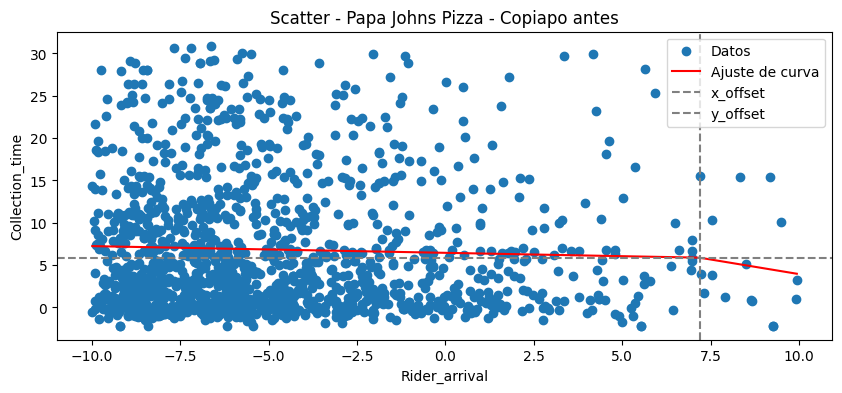

Parámetros ajustados (x0, y0, k1, k2): [ 7.18332932  5.87170134 -0.07941302 -0.69061398]


In [17]:
partner_id_estudio=341835

prep_time_antes=partners_prep_time_promedio[(partners_prep_time_promedio["dim_partner_partner_id"]==partner_id_estudio) & (partners_prep_time_promedio["grupo"]=="comparacion")]["estimated_prep_time"].values


dfchart=dfantes[(dfantes["dim_partner_partner_id"]==partner_id_estudio) & (dfantes["rider_arrival"]<=10) & (dfantes["rider_arrival"]>=-10) & (dfantes["collection_time"]<=prep_time_antes[0]+2)] 

partner_name = dfchart["dim_partner_partner_name"].iloc[0]

def piecewise_linear(x, x0, y0, k1, k2):
    return np.where(x < x0, k1 * (x - x0) + y0, k2 * (x - x0) + y0)

# Valores iniciales para los parámetros: punto de cambio x0, offset y0, pendientes k1 y k2
p0 = [0, 0, -1, 0]
bounds = ([-10, -np.inf, -np.inf, -np.inf], [10, np.inf, np.inf, np.inf])

# Ajustar el modelo a los datos
popt, pcov = curve_fit(piecewise_linear, dfchart['rider_arrival'], dfchart['collection_time'], p0, bounds=bounds)

# Visualizar el ajuste
x_fit = np.linspace(dfchart['rider_arrival'].min(), dfchart['rider_arrival'].max(), 100)
y_fit = piecewise_linear(x_fit, *popt)
plt.figure(figsize=(10, 4))
plt.scatter(dfchart['rider_arrival'], dfchart['collection_time'], label='Datos')
plt.plot(x_fit, y_fit, color='red', label='Ajuste de curva')
plt.title(f'Scatter - {partner_name} antes')
plt.xlabel('Rider_arrival')
plt.ylabel('Collection_time')
plt.axvline(x=popt[0], color='gray', linestyle='--', label='x_offset')
plt.axhline(y=popt[1], color='gray', linestyle='--', label='y_offset')
plt.legend()
plt.show()

print("Parámetros ajustados (x0, y0, k1, k2):", popt)

In [18]:
prep_time_antes

array([29.])

count    2.494925e+06
mean     1.940587e+01
std      9.417987e+00
min      0.000000e+00
25%      1.250000e+01
50%      1.796667e+01
75%      2.458333e+01
max      6.000000e+01
Name: assumed_prep_time, dtype: float64
nan


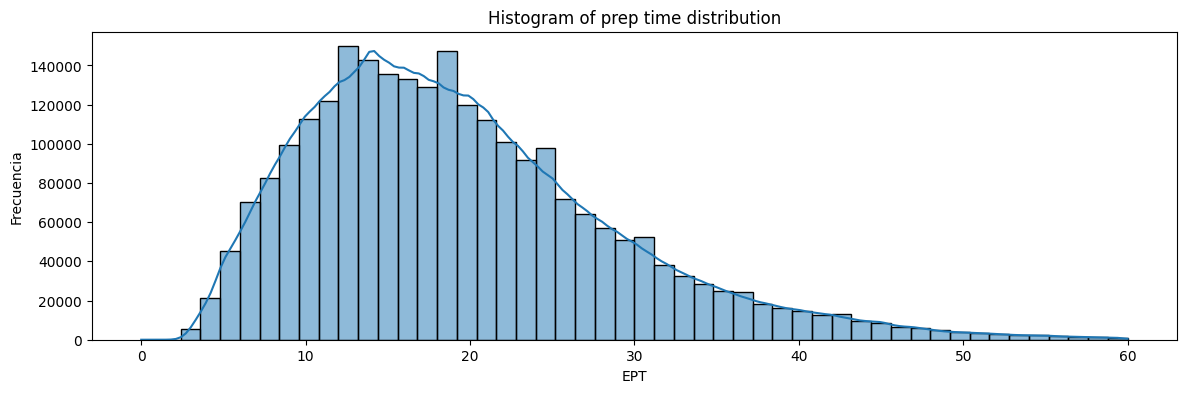

In [43]:
import seaborn as sns
from scipy.stats import percentileofscore
dfchart=df1[(df1["business_type_name"]=="Restaurant")]
# Mostrar estadísticas descriptivas básicas
print(dfchart['assumed_prep_time'].describe())
print(percentileofscore(dfchart['assumed_prep_time'], 8))

# Histograma
plt.figure(figsize=(14, 4))
sns.histplot(dfchart['assumed_prep_time'], bins=50, kde=True)
#plt.title('Distribución de cambios de prep time + avtc abril-junio')
plt.title('Histogram of prep time distribution')
plt.xlabel('EPT')
plt.ylabel('Frecuencia')
plt.show()

In [47]:

percentil_55 = dfchart['assumed_prep_time'].quantile(0.45)
print(f"Percentil 55% de 'assumed': {percentil_55}")

Percentil 55% de 'assumed': 16.816666666666666


Usando modelo piecewise


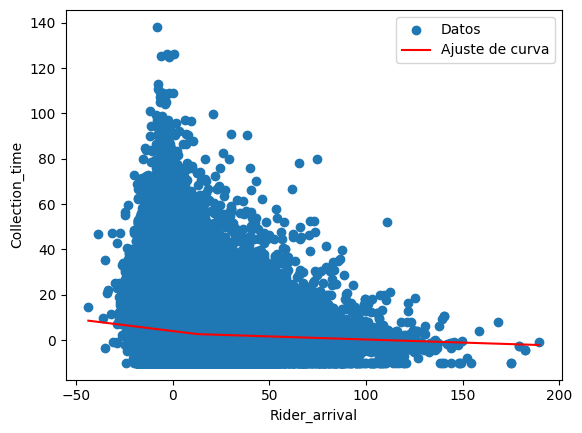

In [20]:

def linear(x, m, c):
    return m * x + c

# Modelo piecewise lineal
def piecewise_linear(x, x0, y0, k1, k2):
    return np.where(x < x0, k1 * (x - x0) + y0, k2 * (x - x0) + y0)

# Ajustar modelo lineal
popt_linear, _ = curve_fit(linear, dfchart['rider_arrival'], dfchart['collection_time'])

# Ajustar modelo piecewise
p0_piecewise = [0, 0, -1, 0]
popt_piecewise, _ = curve_fit(piecewise_linear, dfchart['rider_arrival'], dfchart['collection_time'], p0_piecewise)

# Calcular errores
residuals_linear = dfchart['collection_time'] - linear(dfchart['rider_arrival'], *popt_linear)
residuals_piecewise = dfchart['collection_time'] - piecewise_linear(dfchart['rider_arrival'], *popt_piecewise)
error_linear = np.sum(residuals_linear**2)
error_piecewise = np.sum(residuals_piecewise**2)

# Seleccionar el modelo con menor error
if error_linear < error_piecewise:
    print("Usando modelo lineal")
    x_fit = np.linspace(df1['rider_arrival'].min(), dfchart['rider_arrival'].max(), 100)
    y_fit = linear(x_fit, *popt_linear)
else:
    print("Usando modelo piecewise")
    x_fit = np.linspace(dfchart['rider_arrival'].min(), dfchart['rider_arrival'].max(), 100)
    y_fit = piecewise_linear(x_fit, *popt_piecewise)

# Visualizar el ajuste
plt.scatter(dfchart['rider_arrival'], dfchart['collection_time'], label='Datos')
plt.plot(x_fit, y_fit, color='red', label='Ajuste de curva')
plt.xlabel('Rider_arrival')
plt.ylabel('Collection_time')
plt.legend()
plt.show()


In [21]:
partnerssospechosos=pd.read_csv("partners que esperan al rider para preparar el pedido 29 de julio- final - partners malos 3 (4).csv")
#partnerssospechosos=partnerssospechosos[partnerssospechosos["Orders_cambio"]>=50]
idspartnerssospechosos=partnerssospechosos["dim_partner_partner_id_"].unique()
partnerssospechosos

,dim_partner_partner_id_,dim_partner_partner_name_,franchise_name_,mall_,business_type_name_,cuisine_,Limite de Prep Time_,city_,%slowdelivery_cambio,%slowdelivery_comparacion,...,prep_time_mas_atvc_comparacion,%_orders,diff_prep_time,diff_avtc,diff_vendor_late,diff_limite,diff_prep_time_mas_atvc,diff_slow,%aumento_orders,Unnamed: 34
0,485508,ookini sushi bar,hq ookini sushi,0,Restaurant,sushi,60,Iquique,0.958678,0.476190,...,34.958583,0.000254,23.169393,3.269568,0.064772,-10.721763,26.438961,0.482487,1.234694,485508.0
1,122368,okinawa sushi chipana,okinawa,0,Restaurant,sushi,60,Iquique,0.636364,0.135081,...,25.100000,0.000208,11.394204,9.473049,0.327278,-26.474747,20.867253,0.501283,0.598790,122368.0
2,487421,domani pizza - plaza pedro de valdivia,domani pizza las condes,0,Restaurant,pizzas,30,Santiago,0.805755,0.339130,...,25.800000,0.000097,18.683891,0.737311,-0.094156,5.223022,19.421202,0.466625,1.208696,487421.0
3,163624,texas burger - alto hospicio,no franchise,0,Restaurant,hamburguesas,26,Iquique,0.917431,0.767857,...,40.000000,0.000076,9.502075,9.908656,0.187683,12.633028,19.410731,0.149574,0.648810,163624.0
4,124773,mc byron,no franchise,0,Restaurant,completos,25,Santiago,0.650602,0.157895,...,18.294577,0.000058,15.892042,3.390194,0.230159,3.457831,19.282235,0.492708,1.092105,124773.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,146333,sushi rolls - delivery galilea,no franchise,0,Restaurant,pollo,26,Los angeles,0.433962,0.578947,...,40.212719,0.000037,-2.015392,-1.612908,-0.110000,7.905660,-3.628301,-0.144985,1.394737,NaN
473,129956,juan maestro - intermodal la cisterna,juan maestro,0,Restaurant,sándwiches,23,Santiago,0.581081,0.791139,...,42.326450,0.000052,-1.636846,-3.153821,-0.112300,7.337838,-4.790667,-0.210058,0.468354,NaN
474,422580,tres brasas,no franchise,0,Restaurant,comida italiana,30,Antofagasta,0.944444,0.971429,...,48.804206,0.000025,-7.154762,2.345292,0.550877,6.416667,-4.809470,-0.026984,1.028571,NaN
475,165483,doggis portal temuco,doggis,1,Restaurant,completos,23,Temuco,0.463235,0.879032,...,43.423910,0.000095,-7.924810,-2.743106,-0.157804,5.139706,-10.667916,-0.415797,1.096774,NaN


In [22]:
# Inicializar una lista para guardar los resultados combinados
results_combined = []

# Iterar sobre cada id en el array idspartnerssospechosos
for partner_id_estudio in idspartnerssospechosos:
    
    #print(partner_id_estudio)
    # Filtrar datos para "antes"
    prep_time_antes = partners_prep_time_promedio[
        (partners_prep_time_promedio["dim_partner_partner_id"] == partner_id_estudio) &
        (partners_prep_time_promedio["grupo"] == "comparacion")
    ]["estimated_prep_time"].values

    dfchart_antes = dfantes[
        (dfantes["dim_partner_partner_id"] == partner_id_estudio) &
        (dfantes["rider_arrival"] <= 15) &
        (dfantes["rider_arrival"] >= -15) &
        (dfantes["collection_time"] <= prep_time_antes[0] + 2)
    ]

    # Filtrar datos para "despues"
    prep_time_despues = partners_prep_time_promedio[
        (partners_prep_time_promedio["dim_partner_partner_id"] == partner_id_estudio) &
        (partners_prep_time_promedio["grupo"] == "cambios")
    ]["estimated_prep_time"].values

    dfchart_despues = dfdespues[
        (dfdespues["dim_partner_partner_id"] == partner_id_estudio) &
        (dfdespues["rider_arrival"] <= 15) &
        (dfdespues["rider_arrival"] >= -15) &
        (dfdespues["collection_time"] <= prep_time_despues[0] + 10)
    ]

    if len(dfchart_antes) == 0 or len(dfchart_despues) == 0:
        continue

    # Definir la función lineal por tramos
    def piecewise_linear(x, x0, y0, k1, k2):
        return np.where(x < x0, k1 * (x - x0) + y0, k2 * (x - x0) + y0)

    bounds = ([-0.5, -np.inf, -np.inf, -np.inf], [0.5, np.inf, np.inf, np.inf])
    # Ajustar el modelo a los datos "antes"
    p0_antes = [0, 0, -1, 0]
    
    popt_antes, _ = curve_fit(piecewise_linear, dfchart_antes['rider_arrival'], dfchart_antes['collection_time'], p0_antes, bounds=bounds)

    # Ajustar el modelo a los datos "despues"
    p0_despues = [0, 0, -1, 0]
    popt_despues, _ = curve_fit(piecewise_linear, dfchart_despues['rider_arrival'], dfchart_despues['collection_time'], p0_despues, bounds=bounds)

    x_offset_antes = popt_antes[0]
    y_offset_antes = popt_antes[1]
    # Calcular el porcentaje de puntos después del cambio de pendiente
    total_points_antes = len(dfchart_antes)
    points_after_antes = len(dfchart_antes[dfchart_antes['rider_arrival'] > x_offset_antes])
    points_after_antes_abajo = len(dfchart_antes[(dfchart_antes['rider_arrival'] > x_offset_antes) & (dfchart_antes['collection_time'] <= y_offset_antes)   ])
    percentage_after_antes = (points_after_antes / total_points_antes) * 100

    
    x_offset_despues = popt_despues[0]
    y_offset_despues = popt_despues[1]
    # Calcular el porcentaje de puntos después del cambio de pendiente
    total_points_despues = len(dfchart_despues)
    points_after_despues = len(dfchart_despues[dfchart_despues['rider_arrival'] > x_offset_despues])
    points_after_despues_abajo = len(dfchart_despues[(dfchart_despues['rider_arrival'] > x_offset_despues) & (dfchart_despues['collection_time'] <= y_offset_despues)   ])
    percentage_after_despues = (points_after_despues / total_points_despues) * 100
  
    

#

    # Guardar los parámetros ajustados
    results_combined.append({
        'partner_id': partner_id_estudio,
        'x0_antes': popt_antes[0],
        'y0_antes': popt_antes[1],
        'k1_antes': popt_antes[2],
        'k2_antes': popt_antes[3],
        '%_despues_antes': percentage_after_antes,
   
        'x0_despues': popt_despues[0],
        'y0_despues': popt_despues[1],
        'k1_despues': popt_despues[2],
        'k2_despues': popt_despues[3],
        '%_despues_despues': percentage_after_despues,
 
        
    })

  

results_df = pd.DataFrame(results_combined)



In [23]:
results_df = pd.DataFrame(results_combined)
results_df

,partner_id,x0_antes,y0_antes,k1_antes,k2_antes,%_despues_antes,x0_despues,y0_despues,k1_despues,k2_despues,%_despues_despues
0,485508,0.500000,3.059908,-0.464720,-0.062014,30.241935,-0.500000,10.584220,-0.354546,0.578782,32.989691
1,122368,0.500000,0.432090,-0.332087,-0.072627,11.496746,0.500000,8.567779,-0.173005,0.098221,16.393443
2,487421,0.500000,7.853794,-0.391066,0.009383,53.465347,0.500000,10.054344,-0.150270,0.193082,38.518519
3,163624,-0.183340,8.021597,-0.636892,-0.079678,44.444444,-0.500000,16.035865,-0.070653,-0.032892,33.766234
4,124773,-0.500000,4.265647,-0.095308,-0.125382,32.307692,0.500000,10.213463,0.169672,-0.203804,44.871795
...,...,...,...,...,...,...,...,...,...,...,...
472,146333,-0.500000,2.071663,-0.780939,-0.392631,18.750000,0.500000,1.084677,-0.321784,-0.054659,13.461538
473,129956,0.500000,9.135482,-0.133481,-0.109044,26.143791,-0.500000,11.930171,0.815011,-0.963962,13.888889
474,422580,-0.216682,4.422415,-0.332546,-0.250068,36.666667,0.499998,8.794156,-8.996983,-0.372022,100.000000
475,165483,-0.500000,7.033083,-0.026695,0.280460,22.522523,0.500000,4.497977,-0.011088,-0.663680,7.843137


In [24]:
results_df['nueva_columna'] = results_df.apply(
    lambda row: (
        'esperan_al_rider_certeza' if ( row['y0_despues'] >= 10 and   row['k2_despues'] >= -0.5 and row['%_despues_despues'] >= 15)
        
        or ( row['y0_despues'] >= 5 and row['y0_despues'] < 10 and row['k2_despues'] >= 0 and row['%_despues_despues'] >= 15)
        or (row['y0_despues'] < 5 and row['k2_despues'] >= 0.3 and row['%_despues_despues'] >= 15)
        
        else 
         'esperan_al_rider_no_certeza' if ( row['y0_despues'] >= 10 and   row['k2_despues'] >= 0 and row['%_despues_despues'] < 15)
         or (row['y0_despues'] >= 5 and row['y0_despues'] < 10 and row['k2_despues'] >= -0.1 and row['%_despues_despues'] < 15)
         or (row['y0_despues'] < 5 and row['k2_despues'] >= 0.3 and row['%_despues_despues'] < 15)

        else 'no_esperan_al_rider_certeza' if ( row['y0_despues'] >= 10 and   row['k2_despues'] < -0.5 and row['%_despues_despues'] >= 15)
        or (row['y0_despues'] >= 5 and row['y0_despues'] < 10 and row['k2_despues'] < 0 and row['%_despues_despues'] >= 15)
        or (row['y0_despues'] < 5 and row['k2_despues'] < 0.3 and row['%_despues_despues'] >= 15)
        

        else 'no_esperan_al_rider_no_certeza' if ( row['y0_despues'] >= 10 and   row['k2_despues'] < -0.5 and row['%_despues_despues'] < 15)
        or (row['y0_despues'] >= 5 and row['y0_despues'] < 10 and row['k2_despues'] < 0 and row['%_despues_despues'] < 15)
        or (row['y0_despues'] < 5 and row['k2_despues'] < 0.3 and row['%_despues_despues'] < 15)
        
        else "no_definido"
    ),
    axis=1
)

In [25]:


results_df['tendencia_antes_categoria'] = results_df.apply(
    lambda row: (
        'tendencia_positiva_alta' if ( row['k2_despues'] >= 0.2 )

        else 
        'tendencia_positiva_baja' if ( row['k2_despues'] >= 0 )

        else
        
        'tendencia_negativa_baja' if ( row['k2_despues'] >= -0.2 )

        else
        'tendencia_negativa_alta'
        
    ),
    axis=1
)

results_df['tendencia_despues_categoria'] = results_df.apply(
    lambda row: (
        'tendencia_positiva_alta' if ( row['k2_despues'] >= 0.2 )

        else 
        'tendencia_positiva_baja' if ( row['k2_despues'] >= 0 )

        else
        
        'tendencia_negativa_baja' if ( row['k2_despues'] >= -0.2 )

        else
        'tendencia_negativa_alta'
        
    ),
    axis=1
)

results_df['collection_time_categoria'] = results_df.apply(
    lambda row: (
        'alto' if ( row['y0_despues'] >= 8 )

        else 
        'medio' if ( row['y0_despues'] >= 3 )

        else
        'bajo'
        

    ),
    axis=1
)


results_df['&_despues_categoria'] = results_df.apply(
    lambda row: (
        '%_alto' if ( row['%_despues_despues'] >= 20)

        else
        '%_baja'
        
    ),
    axis=1
)



In [26]:
results_df

,partner_id,x0_antes,y0_antes,k1_antes,k2_antes,%_despues_antes,x0_despues,y0_despues,k1_despues,k2_despues,%_despues_despues,nueva_columna,tendencia_antes_categoria,tendencia_despues_categoria,collection_time_categoria,&_despues_categoria
0,485508,0.500000,3.059908,-0.464720,-0.062014,30.241935,-0.500000,10.584220,-0.354546,0.578782,32.989691,esperan_al_rider_certeza,tendencia_positiva_alta,tendencia_positiva_alta,alto,%_alto
1,122368,0.500000,0.432090,-0.332087,-0.072627,11.496746,0.500000,8.567779,-0.173005,0.098221,16.393443,esperan_al_rider_certeza,tendencia_positiva_baja,tendencia_positiva_baja,alto,%_baja
2,487421,0.500000,7.853794,-0.391066,0.009383,53.465347,0.500000,10.054344,-0.150270,0.193082,38.518519,esperan_al_rider_certeza,tendencia_positiva_baja,tendencia_positiva_baja,alto,%_alto
3,163624,-0.183340,8.021597,-0.636892,-0.079678,44.444444,-0.500000,16.035865,-0.070653,-0.032892,33.766234,esperan_al_rider_certeza,tendencia_negativa_baja,tendencia_negativa_baja,alto,%_alto
4,124773,-0.500000,4.265647,-0.095308,-0.125382,32.307692,0.500000,10.213463,0.169672,-0.203804,44.871795,esperan_al_rider_certeza,tendencia_negativa_alta,tendencia_negativa_alta,alto,%_alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,146333,-0.500000,2.071663,-0.780939,-0.392631,18.750000,0.500000,1.084677,-0.321784,-0.054659,13.461538,no_esperan_al_rider_no_certeza,tendencia_negativa_baja,tendencia_negativa_baja,bajo,%_baja
473,129956,0.500000,9.135482,-0.133481,-0.109044,26.143791,-0.500000,11.930171,0.815011,-0.963962,13.888889,no_esperan_al_rider_no_certeza,tendencia_negativa_alta,tendencia_negativa_alta,alto,%_baja
474,422580,-0.216682,4.422415,-0.332546,-0.250068,36.666667,0.499998,8.794156,-8.996983,-0.372022,100.000000,no_esperan_al_rider_certeza,tendencia_negativa_alta,tendencia_negativa_alta,alto,%_alto
475,165483,-0.500000,7.033083,-0.026695,0.280460,22.522523,0.500000,4.497977,-0.011088,-0.663680,7.843137,no_esperan_al_rider_no_certeza,tendencia_negativa_alta,tendencia_negativa_alta,medio,%_baja


In [27]:
results_df['categoria_final'] = results_df.apply(
    lambda row: (
        'problema_collection_time_alto' if row['collection_time_categoria'] == "alto"

        else 'problema_collection_time_medio_tendencia_alza' if (row['collection_time_categoria'] == "medio" and row['tendencia_despues_categoria'] in ["tendencia_positiva_baja", "tendencia_positiva_alta"])

        #else 'problema_collection_time_bajo_tendencia_alza' if (row['collection_time_categoria'] == "bajo" and row['tendencia_despues_categoria'] == "tendencia_positiva_alta")

        else 'problema_collection_time_medio_tendencia_negativa_baja' if (row['collection_time_categoria'] == "medio" and row['tendencia_despues_categoria'] in ["tendencia_negativa_baja"])

        else 'problema_collection_time_medio_tendencia_negativa_alta' if (row['collection_time_categoria'] == "medio" and row['tendencia_despues_categoria'] in ["tendencia_negativa_alta"])
        
        else 'problema_no_definido'
    ),
    axis=1
)

In [28]:
results_df.to_csv("ver_partners.csv")

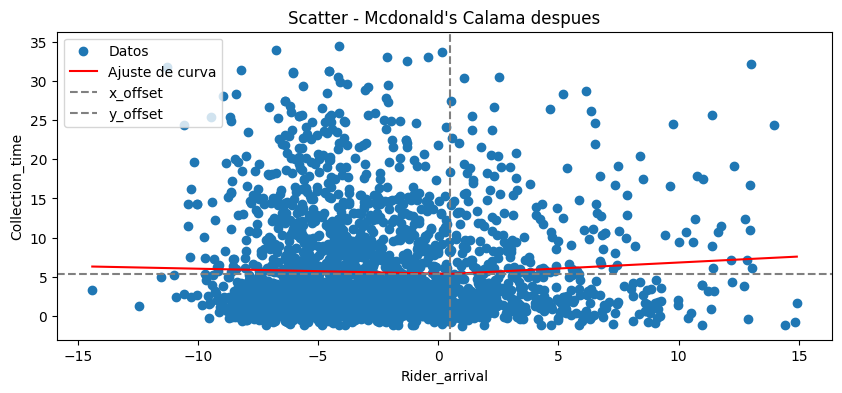

Parámetros ajustados (x0, y0, k1, k2): [ 0.5         5.38862738 -0.06284551  0.15246789]


In [31]:
partner_id_estudio=478699
prep_time_despues=partners_prep_time_promedio[(partners_prep_time_promedio["dim_partner_partner_id"]==partner_id_estudio) & (partners_prep_time_promedio["grupo"]=="cambios")]["estimated_prep_time"].values
dfchart=dfdespues[(dfdespues["dim_partner_partner_id"]==partner_id_estudio) & (dfdespues["rider_arrival"]<=15) & (dfdespues["rider_arrival"]>=-15) & (dfdespues["collection_time"]<=prep_time_despues[0]+10) ] 
partner_name = dfchart["dim_partner_partner_name"].iloc[0]

def piecewise_linear(x, x0, y0, k1, k2):
    return np.where(x < x0, k1 * (x - x0) + y0, k2 * (x - x0) + y0)

# Valores iniciales para los parámetros: punto de cambio x0, offset y0, pendientes k1 y k2
p0 = [0, 0, -1, 0]
bounds = ([-0.5, -np.inf, -np.inf, -np.inf], [0.5, np.inf, np.inf, np.inf])

# Ajustar el modelo a los datos
popt, pcov = curve_fit(piecewise_linear, dfchart['rider_arrival'], dfchart['collection_time'], p0, bounds=bounds)

x_offset_despues = popt_despues[0]
    # Calcular el porcentaje de puntos después del cambio de pendiente
total_points_despues = len(dfdespues)
points_after_despues = len(dfdespues[dfdespues['rider_arrival'] > x_offset_despues])
percentage_after_despues = (points_after_despues / total_points_despues) * 100

# Visualizar el ajuste
x_fit = np.linspace(dfchart['rider_arrival'].min(), dfchart['rider_arrival'].max(), 100)
y_fit = piecewise_linear(x_fit, *popt)
plt.figure(figsize=(10, 4))
plt.title(f'Scatter - {partner_name} despues')
plt.scatter(dfchart['rider_arrival'], dfchart['collection_time'], label='Datos')
plt.plot(x_fit, y_fit, color='red', label='Ajuste de curva')
plt.xlabel('Rider_arrival')
plt.ylabel('Collection_time')
plt.axvline(x=popt[0], color='gray', linestyle='--', label='x_offset')
plt.axhline(y=popt[1], color='gray', linestyle='--', label='y_offset')
plt.legend()
plt.show()

print("Parámetros ajustados (x0, y0, k1, k2):", popt)

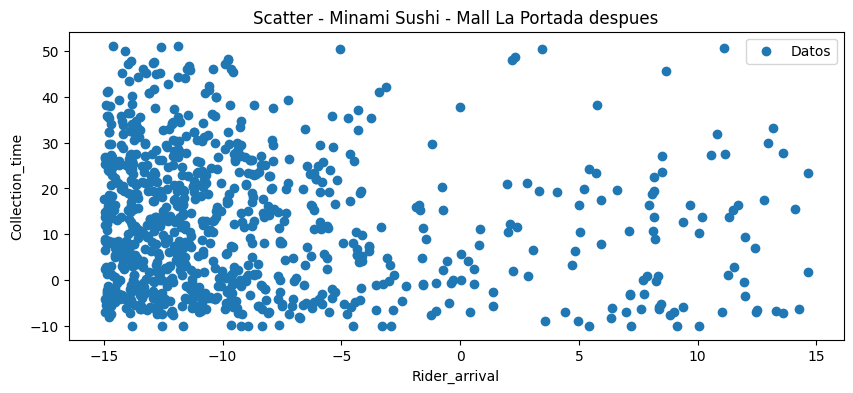

Parámetros ajustados (x0, y0, k1, k2): [-0.5         8.19780576 -0.46184653  0.11231684]


In [76]:

prep_time_despues=partners_prep_time_promedio[(partners_prep_time_promedio["dim_partner_partner_id"]==partner_id_estudio) & (partners_prep_time_promedio["grupo"]=="cambios")]["estimated_prep_time"].values
dfchart=dfdespues[(dfdespues["dim_partner_partner_id"]==partner_id_estudio) & (dfdespues["rider_arrival"]<=15) & (dfdespues["rider_arrival"]>=-15) & (dfdespues["collection_time"]<=prep_time_despues[0]+10) ] 
partner_name = dfchart["dim_partner_partner_name"].iloc[0]

def piecewise_linear(x, x0, y0, k1, k2):
    return np.where(x < x0, k1 * (x - x0) + y0, k2 * (x - x0) + y0)

# Valores iniciales para los parámetros: punto de cambio x0, offset y0, pendientes k1 y k2
p0 = [0, 0, -1, 0]
bounds = ([-0.5, -np.inf, -np.inf, -np.inf], [0.5, np.inf, np.inf, np.inf])

# Ajustar el modelo a los datos
popt, pcov = curve_fit(piecewise_linear, dfchart['rider_arrival'], dfchart['collection_time'], p0, bounds=bounds)

x_offset_despues = popt_despues[0]
    # Calcular el porcentaje de puntos después del cambio de pendiente
total_points_despues = len(dfdespues)
points_after_despues = len(dfdespues[dfdespues['rider_arrival'] > x_offset_despues])
percentage_after_despues = (points_after_despues / total_points_despues) * 100

# Visualizar el ajuste
x_fit = np.linspace(dfchart['rider_arrival'].min(), dfchart['rider_arrival'].max(), 100)
y_fit = piecewise_linear(x_fit, *popt)
plt.figure(figsize=(10, 4))
plt.title(f'Scatter - {partner_name} despues')
plt.scatter(dfchart['rider_arrival'], dfchart['collection_time'], label='Datos')
#plt.plot(x_fit, y_fit, color='red', label='Ajuste de curva')
plt.xlabel('Rider_arrival')
plt.ylabel('Collection_time')
#plt.axvline(x=popt[0], color='gray', linestyle='--', label='x_offset')
#plt.axhline(y=popt[1], color='gray', linestyle='--', label='y_offset')
plt.legend()
plt.show()

print("Parámetros ajustados (x0, y0, k1, k2):", popt)

In [37]:


results = []

# Iterar sobre cada id en el array idspartnerssospechosos
for partner_id_estudio in idspartnerssospechosos:
    # Filtrar datos para el periodo antes
    prep_time_antes = partners_prep_time_promedio[
        (partners_prep_time_promedio["dim_partner_partner_id"] == partner_id_estudio) &
        (partners_prep_time_promedio["grupo"] == "comparacion")
    ]["estimated_prep_time"].values

    dfantes_filtered = dfantes[
        (dfantes["dim_partner_partner_id"] == partner_id_estudio) &
        (dfantes["rider_arrival"] <= 10) &
        (dfantes["rider_arrival"] >= -10) &
        (dfantes["collection_time"] <= prep_time_antes[0] + 2)
    ]

    x_antes = dfantes_filtered['rider_arrival']
    y_antes = dfantes_filtered['collection_time']
    knee_point = 1

    # Segmento izquierdo y derecho para antes
    left_mask_antes = x_antes <= knee_point
    x_left_antes = x_antes[left_mask_antes].values.reshape(-1, 1)
    y_left_antes = y_antes[left_mask_antes].values

    right_mask_antes = x_antes > knee_point
    x_right_antes = x_antes[right_mask_antes].values.reshape(-1, 1)
    y_right_antes = y_antes[right_mask_antes].values

    # Inicializar resultados del periodo antes
    std_left_antes = std_right_antes = percent_below_left_antes = percent_below_right_antes = slope_left_antes = intercept_left_antes = slope_right_antes = intercept_right_antes = None

    if len(x_left_antes) > 0:
        model_left_antes = LinearRegression().fit(x_left_antes, y_left_antes)
        std_left_antes = y_left_antes.std()
        y_pred_left_antes = model_left_antes.predict(x_left_antes)
        below_left_antes = (y_left_antes < y_pred_left_antes).sum()
        total_left_antes = len(y_left_antes)
        percent_below_left_antes = (below_left_antes / total_left_antes) * 100
        slope_left_antes = model_left_antes.coef_[0]
        intercept_left_antes = model_left_antes.intercept_

    if len(x_right_antes) > 0:
        model_right_antes = LinearRegression().fit(x_right_antes, y_right_antes)
        std_right_antes = y_right_antes.std()
        y_pred_right_antes = model_right_antes.predict(x_right_antes)
        below_right_antes = (y_right_antes < y_pred_right_antes).sum()
        total_right_antes = len(y_right_antes)
        percent_below_right_antes = (below_right_antes / total_right_antes) * 100
        slope_right_antes = model_right_antes.coef_[0]
        intercept_right_antes = model_right_antes.intercept_

    # Filtrar datos para el periodo después
    prep_time_despues = partners_prep_time_promedio[
        (partners_prep_time_promedio["dim_partner_partner_id"] == partner_id_estudio) &
        (partners_prep_time_promedio["grupo"] == "cambios")
    ]["estimated_prep_time"].values

    dfdespues_filtered = dfdespues[
        (dfdespues["dim_partner_partner_id"] == partner_id_estudio) &
        (dfdespues["rider_arrival"] <= 10) &
        (dfdespues["rider_arrival"] >= -10) &
        (dfdespues["collection_time"] <= prep_time_despues[0] + 2)
    ]

    x_despues = dfdespues_filtered['rider_arrival']
    y_despues = dfdespues_filtered['collection_time']

    # Segmento izquierdo y derecho para después
    left_mask_despues = x_despues <= knee_point
    x_left_despues = x_despues[left_mask_despues].values.reshape(-1, 1)
    y_left_despues = y_despues[left_mask_despues].values

    right_mask_despues = x_despues > knee_point
    x_right_despues = x_despues[right_mask_despues].values.reshape(-1, 1)
    y_right_despues = y_despues[right_mask_despues].values

    # Inicializar resultados del periodo después
    std_left_despues = std_right_despues = percent_below_left_despues = percent_below_right_despues = slope_left_despues = intercept_left_despues = slope_right_despues = intercept_right_despues = None

    if len(x_left_despues) > 0:
        model_left_despues = LinearRegression().fit(x_left_despues, y_left_despues)
        std_left_despues = y_left_despues.std()
        y_pred_left_despues = model_left_despues.predict(x_left_despues)
        below_left_despues = (y_left_despues < y_pred_left_despues).sum()
        total_left_despues = len(y_left_despues)
        percent_below_left_despues = (below_left_despues / total_left_despues) * 100
        slope_left_despues = model_left_despues.coef_[0]
        intercept_left_despues = model_left_despues.intercept_

    if len(x_right_despues) > 0:
        model_right_despues = LinearRegression().fit(x_right_despues, y_right_despues)
        std_right_despues = y_right_despues.std()
        y_pred_right_despues = model_right_despues.predict(x_right_despues)
        below_right_despues = (y_right_despues < y_pred_right_despues).sum()
        total_right_despues = len(y_right_despues)
        percent_below_right_despues = (below_right_despues / total_right_despues) * 100
        slope_right_despues = model_right_despues.coef_[0]
        intercept_right_despues = model_right_despues.intercept_

    # Guardar resultados
    results.append({
        'partner_id': partner_id_estudio,
        'std_left_antes': std_left_antes,
        'std_right_antes': std_right_antes,
        
        'std_left_despues': std_left_despues,
        'std_right_despues': std_right_despues,
        
        'percent_below_left_antes': percent_below_left_antes,
        'percent_below_right_antes': percent_below_right_antes,
        'percent_below_left_despues': percent_below_left_despues,
        'percent_below_right_despues': percent_below_right_despues,
        
        'slope_left_antes': slope_left_antes,
        'slope_right_antes': slope_right_antes,
        'slope_left_despues': slope_left_despues,
        'slope_right_despues': slope_right_despues,
        'intercept_left_antes': intercept_left_antes,
        'intercept_right_antes': intercept_right_antes,
        
    
        'intercept_left_despues': intercept_left_despues,
        'intercept_right_despues': intercept_right_despues
    })

# Convertir results a un DataFrame
results_df = pd.DataFrame(results)



In [38]:
results_df

,partner_id,std_left_antes,std_right_antes,std_left_despues,std_right_despues,percent_below_left_antes,percent_below_right_antes,percent_below_left_despues,percent_below_right_despues,slope_left_antes,slope_right_antes,slope_left_despues,slope_right_despues,intercept_left_antes,intercept_right_antes,intercept_left_despues,intercept_right_despues
0,102217,4.037713,3.822972,5.768572,5.023659,53.784057,62.897527,59.414991,60.055096,-0.430589,-0.324404,-0.371918,-0.129410,1.861672,2.796263,4.555983,5.466979
1,478699,4.748321,4.958985,5.802243,6.018424,57.930698,60.791367,65.763924,64.843750,-0.242739,0.086213,-0.018704,0.004198,3.372193,3.652687,5.244878,5.474624
2,279628,4.395731,3.810609,6.255072,5.402670,50.957854,64.772727,58.002646,64.864865,-0.584136,-0.202156,-0.383238,-0.302174,1.707488,0.965529,4.984718,5.601269
3,108409,4.033955,3.580126,6.343740,6.274248,53.877551,74.137931,56.689453,62.790698,-0.583028,-0.070799,-0.211080,-0.035987,1.007764,0.389949,4.404722,3.962143
4,309300,10.338379,10.839719,13.355113,12.159348,54.042553,58.208955,53.696498,51.724138,-0.451528,0.327058,-0.498466,-0.491918,8.188688,6.937856,6.485794,9.482949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,463219,4.814099,2.719448,5.263433,1.619050,64.705882,50.000000,63.636364,50.000000,0.780314,-1.052686,0.661578,-0.502625,6.673676,5.023794,4.770779,2.589191
204,337877,3.271886,3.007764,5.824652,1.632736,52.173913,71.428571,61.904762,45.454545,-0.552446,-1.043869,-1.290896,-0.444259,0.178451,3.002455,2.738327,2.946670
205,324198,4.441604,2.678537,4.768118,0.913196,50.000000,60.000000,61.111111,66.666667,0.336519,-0.423446,-1.349158,-0.040569,5.041152,2.698438,0.902595,0.057583
206,307280,4.417872,2.140500,5.190464,4.561817,61.111111,72.727273,70.000000,58.823529,-1.184550,-0.234937,0.184358,0.175736,1.999451,1.803448,3.080556,2.226023


In [ ]:
results_df.to_csv("")

In [ ]:
results_df["diff_std_antes"]=results_df["std_right_antes"]-results_df["std_left_antes"]
results_df["diff_std_antes"]=results_df["std_right_antes"]-results_df["std_left_antes"]

